In [2]:
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#libraries for resampling the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

#libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#libraries for cross validation,train test split,hyperparameter tuning
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif


#libraries for performance metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,RocCurveDisplay, log_loss

#libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the training dataset
train_df = pd.read_csv(r"train.csv")

In [4]:
#Display the first 5 entries of the dataset
train_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
#Shape of the dataset
train_df.shape

(67463, 35)

In [6]:
#Basic information about the features in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [7]:
#Descriptive statistics for numerical features in the dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [8]:
#Descriptive statistics for categorical features in the dataset
train_df.describe(include=["O"]).T

,count,unique,top,freq
Batch Enrolled,67463,41,BAT3873588,3626
Grade,67463,7,C,19085
Sub Grade,67463,35,B4,4462
Employment Duration,67463,3,MORTGAGE,36351
Verification Status,67463,3,Source Verified,33036
Payment Plan,67463,1,n,67463
Loan Title,67463,109,Credit card refinancing,30728
Initial List Status,67463,2,w,36299
Application Type,67463,2,INDIVIDUAL,67340


In [9]:
#columns in the dataset
train_df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [10]:
#Exploratory Data Analysis

#Counts for 'loan status' column
train_df['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

In [11]:
#calculates the percentage distribution of the 'loan_status' column
train_df['Loan Status'].value_counts(normalize=True) *100

Loan Status
0    90.749003
1     9.250997
Name: proportion, dtype: float64

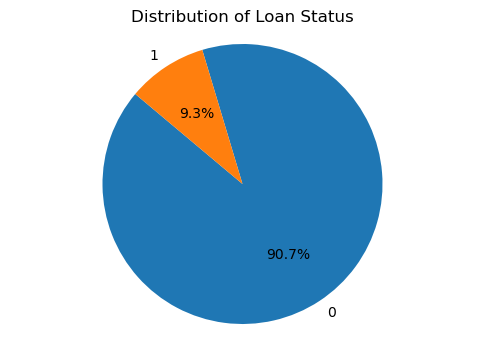

In [12]:
#Plot the target column values and its count.
#Calculate value counts of the target column
status_counts = train_df['Loan Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,4))
plt.pie(status_counts, labels=status_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.axis('equal')  
# Save the plot as PNG file
plt.savefig('Distribution_of_Target_Class.png') 
plt.show()


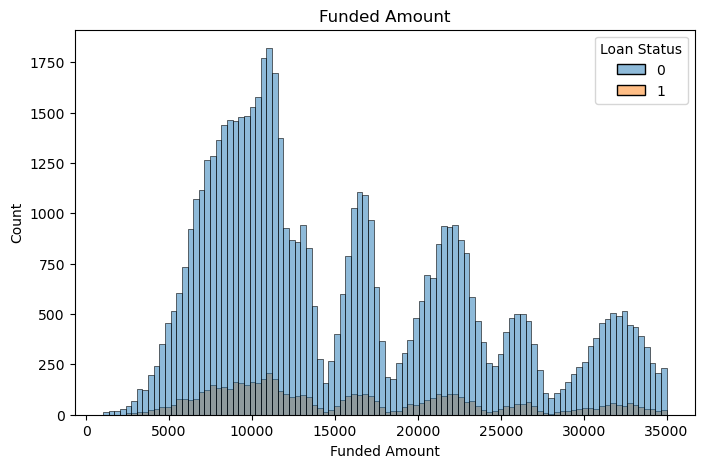

In [13]:
#Generates a bar plot showing the frequency distribution of states
'''plt.figure(figsize=(10,6))
plt.title("addr_state")
train_df["addr_state"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])
plt.show()'''

#Generates a histogram of annual income
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='Funded Amount', hue='Loan Status', bins=100)
plt.title('Funded Amount')
plt.show()

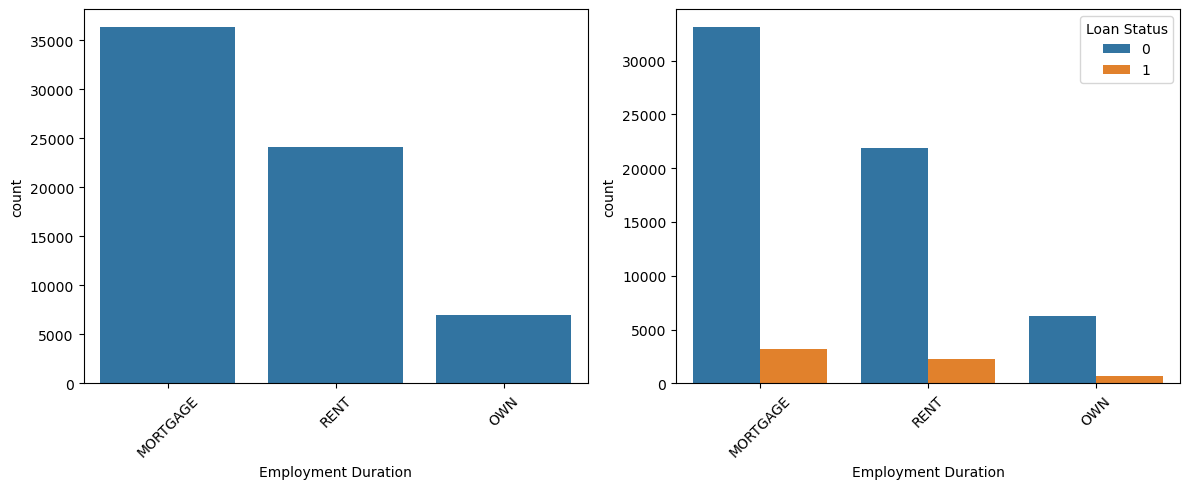

In [14]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot the first countplot on the first axis
# Sort the values of emp_length column
sorted_categories = train_df['Employment Duration'].value_counts().index
sns.countplot(data=train_df, x='Employment Duration',order=sorted_categories,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=45)

# Plot the second countplot on the second axis
sns.countplot(data=train_df, x='Employment Duration', hue='Loan Status',order=sorted_categories, ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

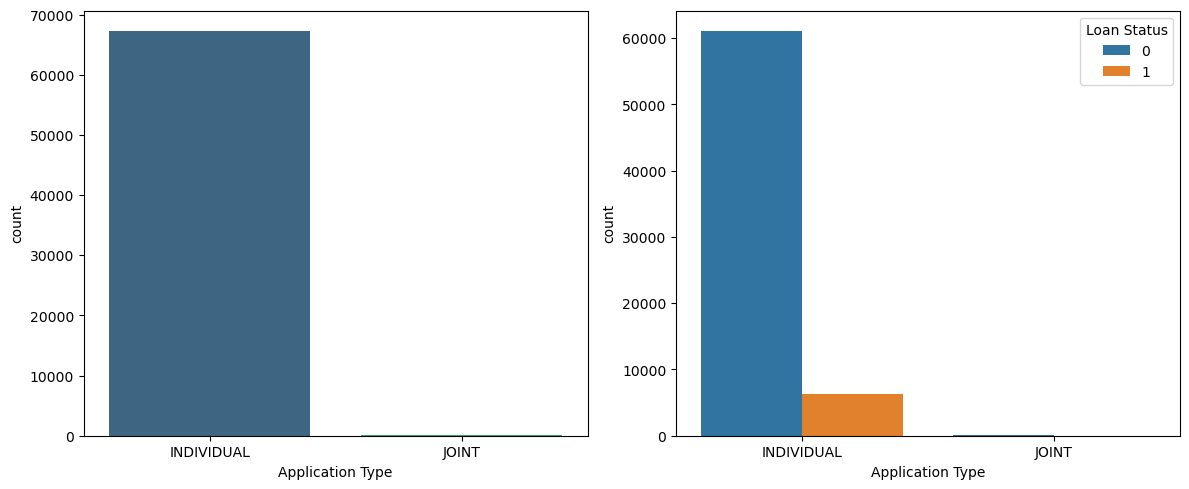

In [15]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['Application Type'].value_counts().index
sns.countplot(data=train_df,x='Application Type',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='Application Type',hue='Loan Status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

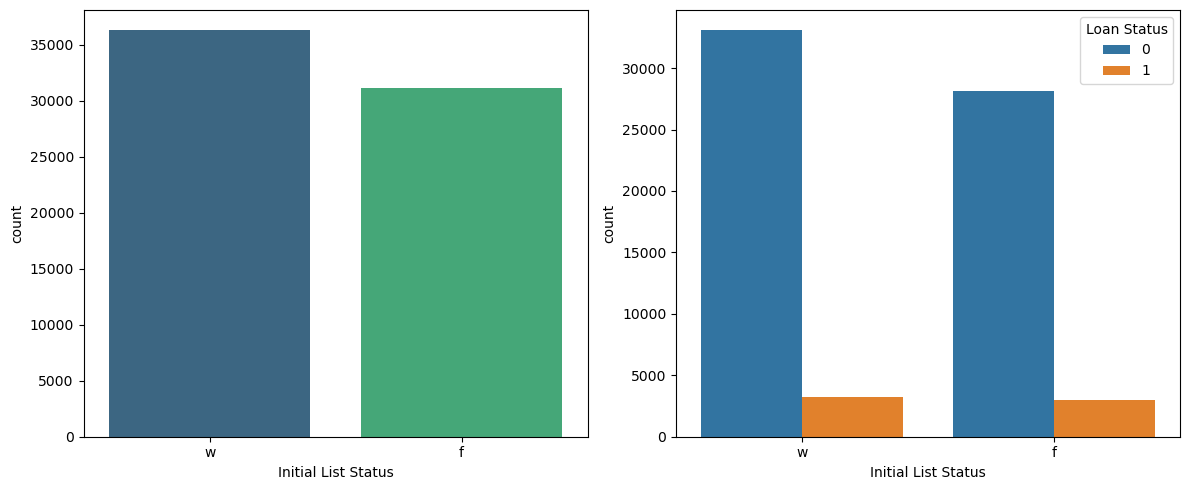

In [16]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['Initial List Status'].value_counts().index
sns.countplot(data=train_df,x='Initial List Status',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='Initial List Status',hue='Loan Status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

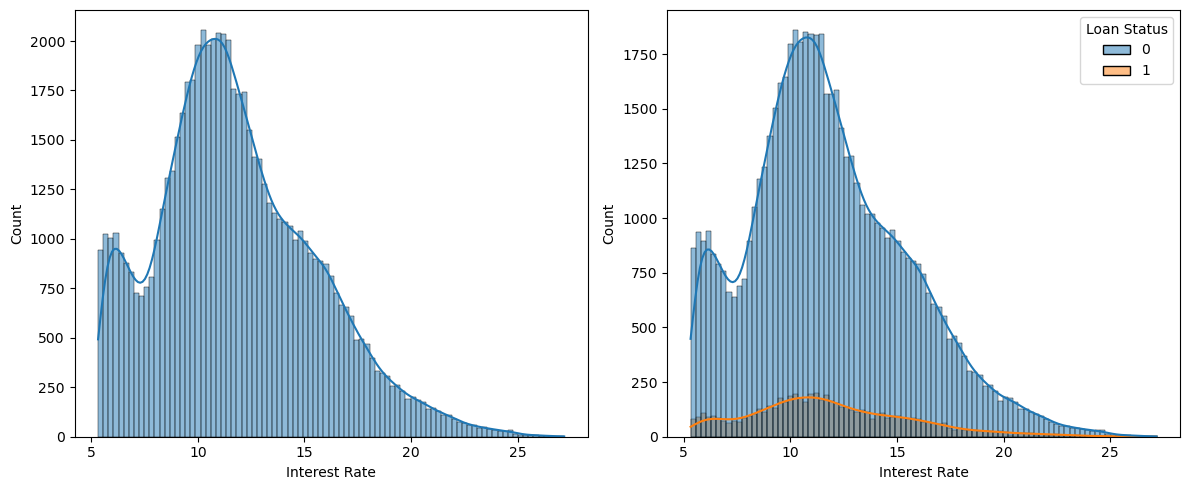

In [17]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='Interest Rate',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='Interest Rate',hue='Loan Status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

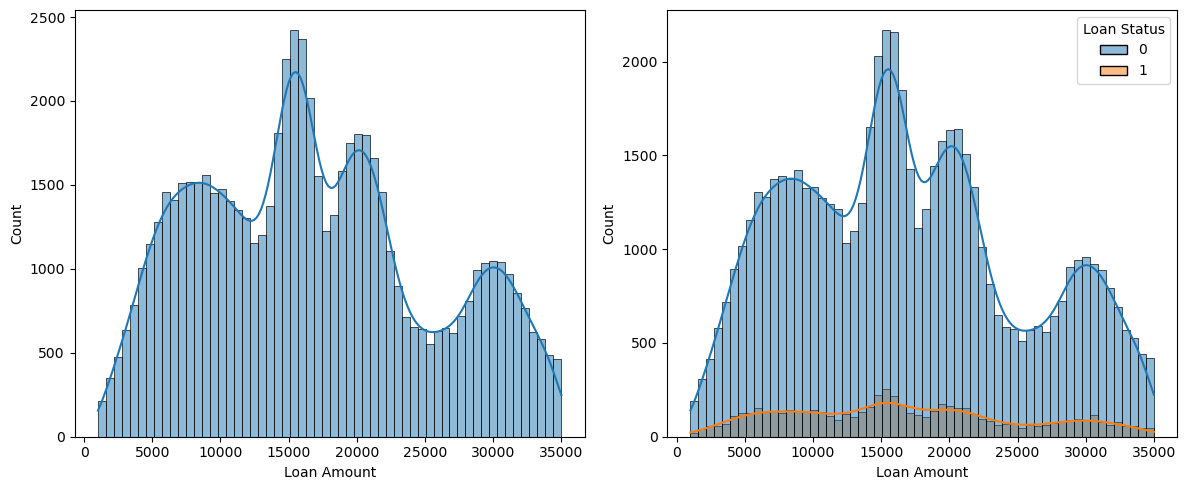

In [18]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='Loan Amount',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='Loan Amount',hue='Loan Status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

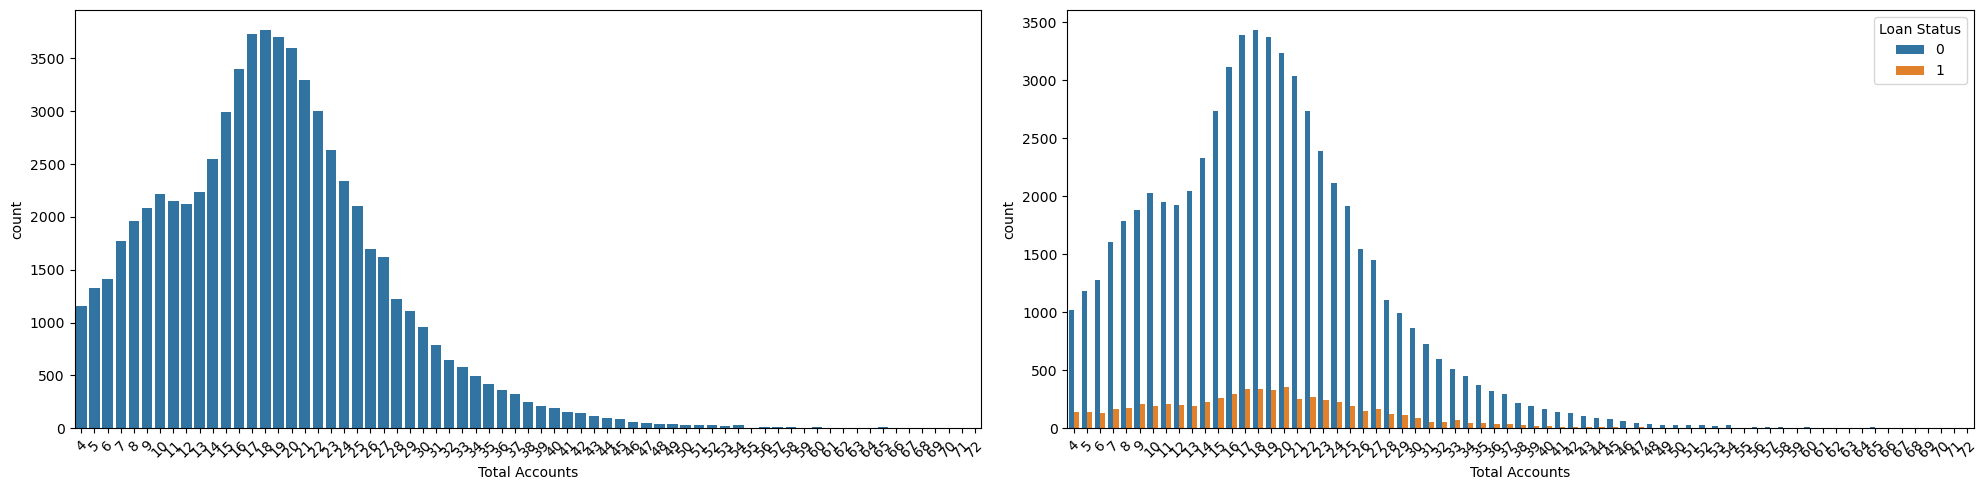

In [19]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.countplot(data=train_df,x='Total Accounts',ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=45)
sns.countplot(data=train_df,x='Total Accounts',hue='Loan Status',ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

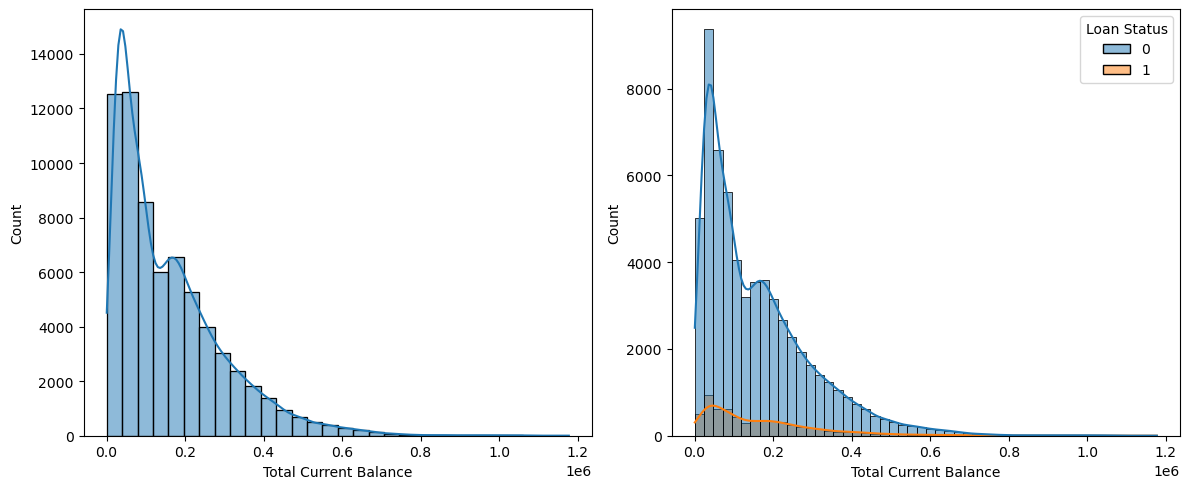

In [20]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='Total Current Balance',kde=True,bins=30,ax=axes[0])
sns.histplot(data=train_df,x='Total Current Balance',hue='Loan Status',kde=True,bins=50,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

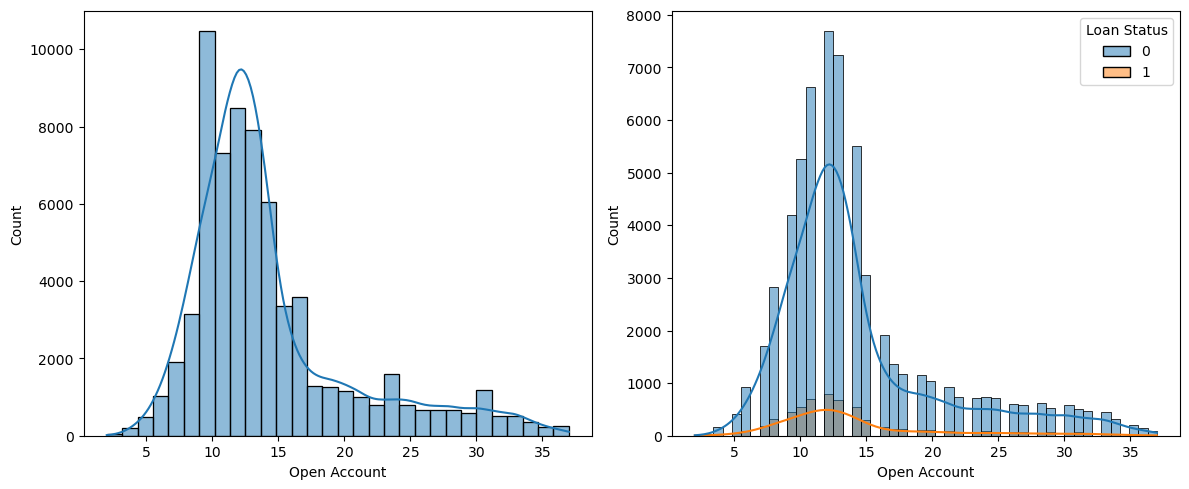

In [21]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='Open Account',kde=True,bins=30,ax=axes[0])
sns.histplot(data=train_df,x='Open Account',hue='Loan Status',kde=True,bins=50,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

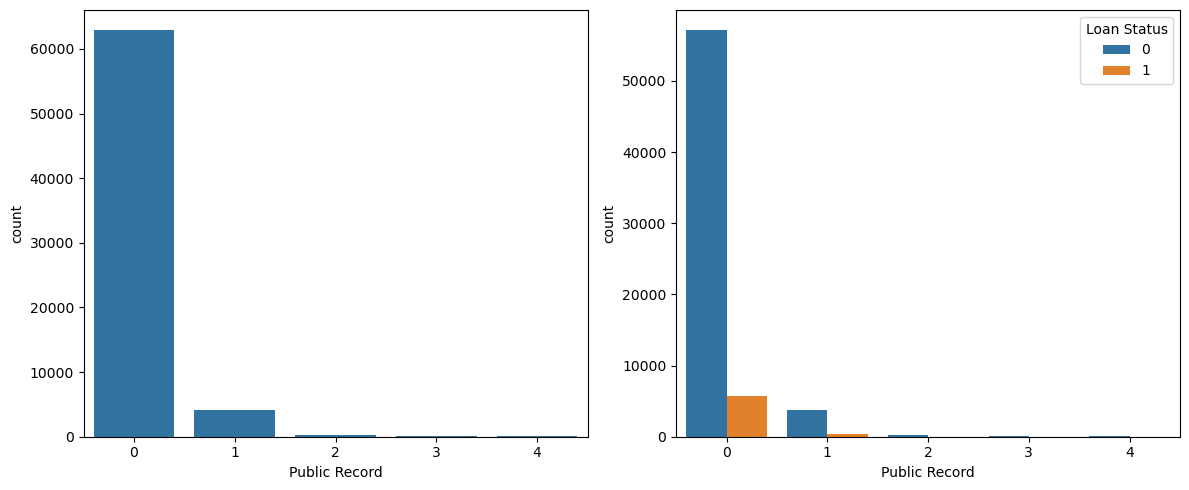

In [22]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=train_df,x='Public Record',ax=axes[0])
sns.countplot(data=train_df,x='Public Record',hue='Loan Status',ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

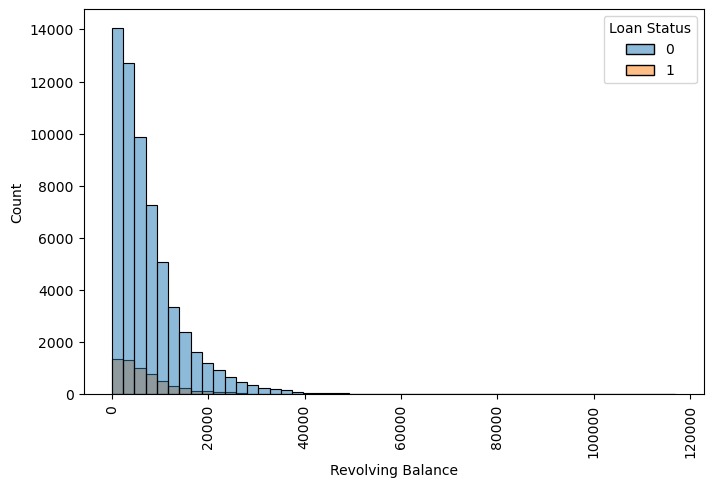

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='Revolving Balance',hue='Loan Status',bins=50)
plt.xticks(rotation=90)
plt.show()

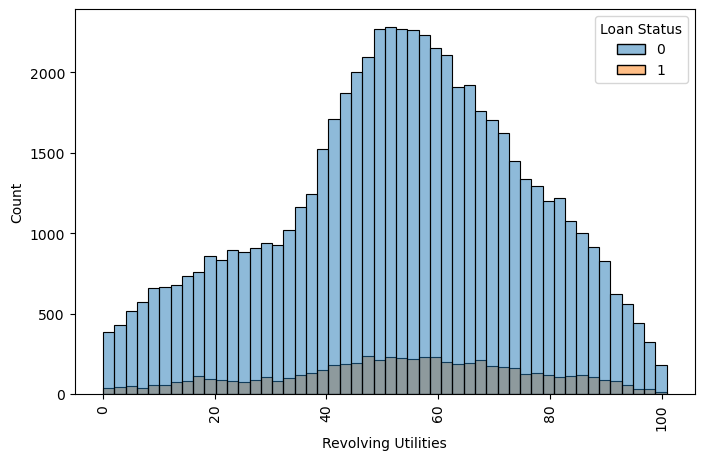

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='Revolving Utilities',hue='Loan Status',bins=50)
plt.xticks(rotation=90)
plt.show()

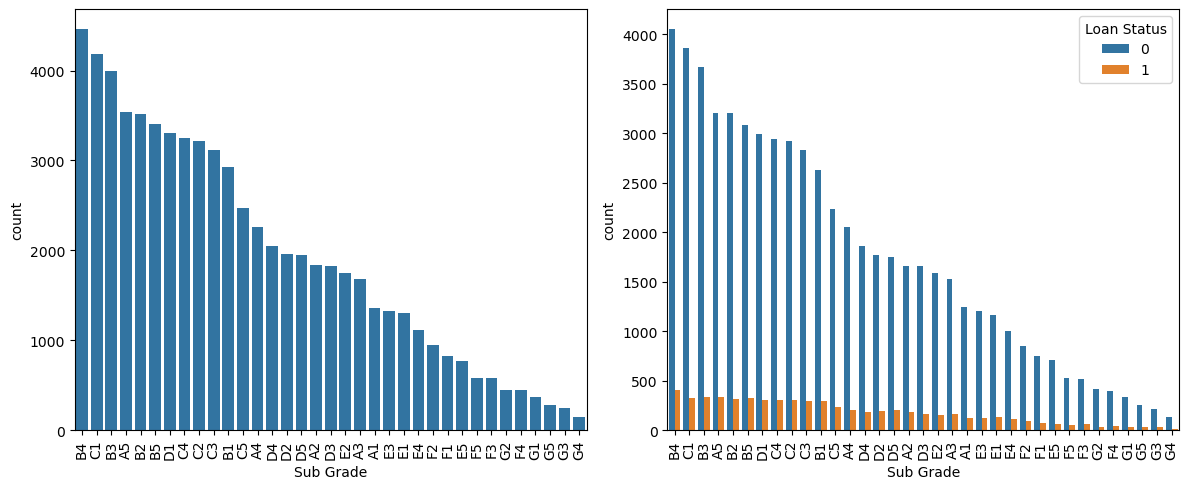

In [25]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['Sub Grade'].value_counts().index
sns.countplot(data=train_df,x='Sub Grade',order=sorted_counts,ax=axes[0])
sns.countplot(data=train_df,x='Sub Grade',hue='Loan Status',order=sorted_counts,ax=axes[1])
# Rotate x-tick labels for both subplots
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

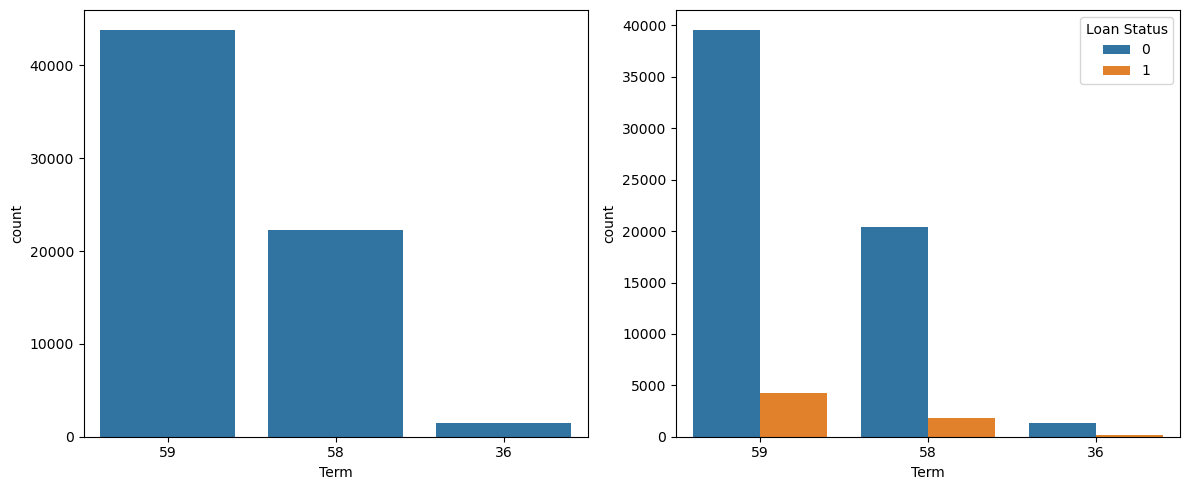

In [26]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['Term'].value_counts().index
sns.countplot(data=train_df,x='Term',order=sorted_counts,ax=axes[0])
sns.countplot(data=train_df,x='Term',hue='Loan Status',order=sorted_counts,ax=axes[1])


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

In [27]:
print(train_df['Loan Title'].nunique())

109


In [28]:
train_df['Loan Title'] = train_df['Loan Title'].str.lower()
print(train_df['Loan Title'].nunique())

83


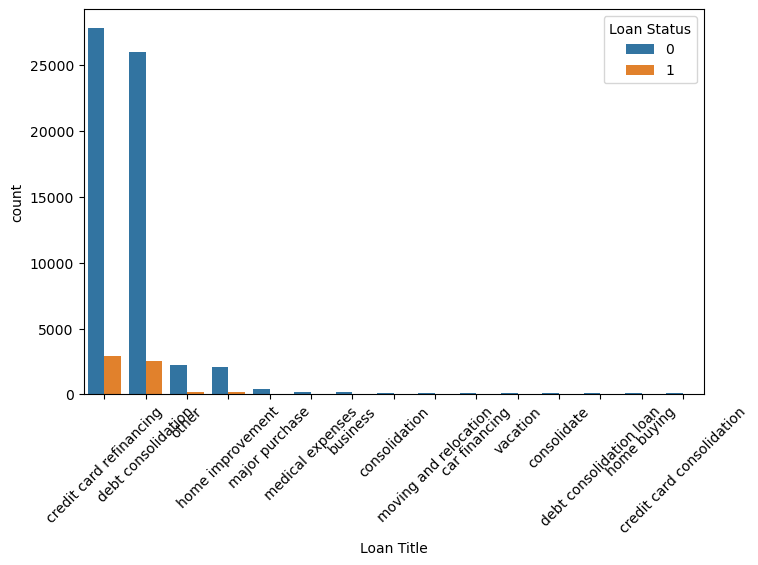

In [29]:
# Determine the top values in the column you're interested in
top_values = train_df['Loan Title'].value_counts().nlargest(15).index

plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Loan Title',hue='Loan Status',order=top_values)
plt.xticks(rotation=45)
plt.show()

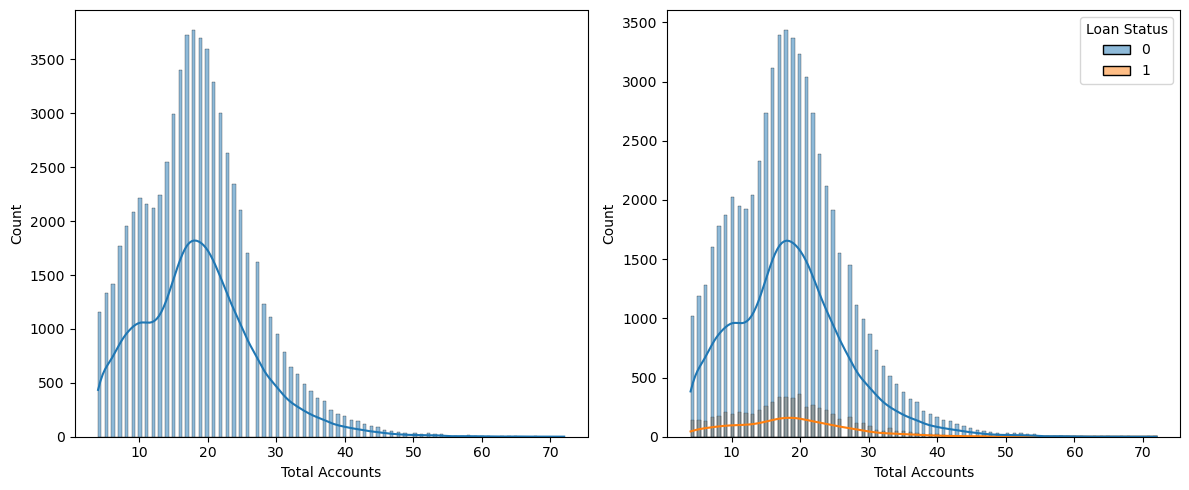

In [30]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='Total Accounts',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='Total Accounts',hue='Loan Status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

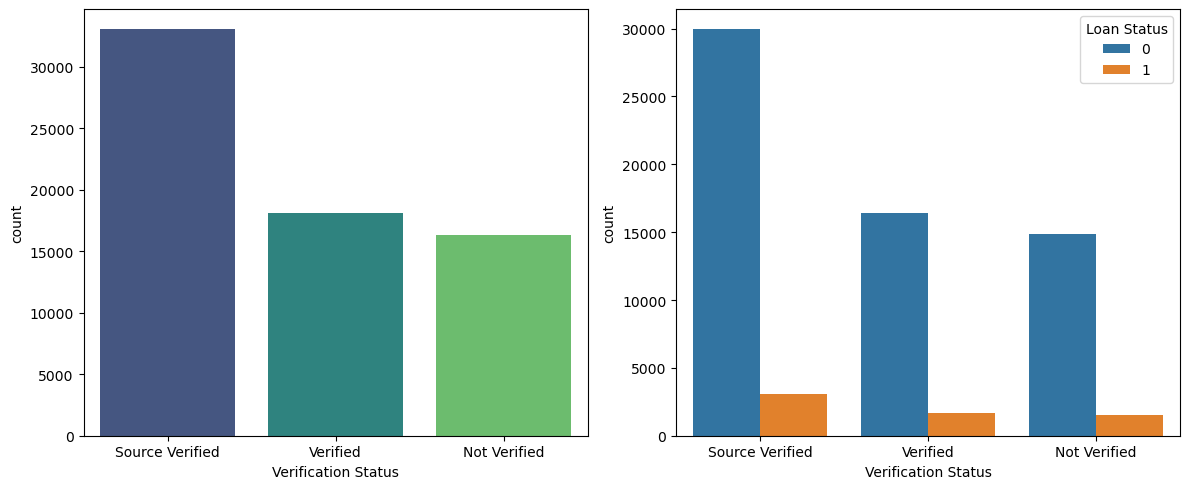

In [31]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['Verification Status'].value_counts().index
sns.countplot(data=train_df,x='Verification Status',order=sorted_counts,ax=axes[0],palette='viridis')
sns.countplot(data=train_df,x='Verification Status',hue='Loan Status',order=sorted_counts,ax=axes[1])


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

In [32]:
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
print(missing_percentage)

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

In [33]:
#checking for duplicates
num_duplicates = train_df.duplicated().sum()
num_duplicates

0

In [34]:
train_df['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

In [35]:
#identify the numerical columns
num_cols = train_df._get_numeric_data().columns
num_cols

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

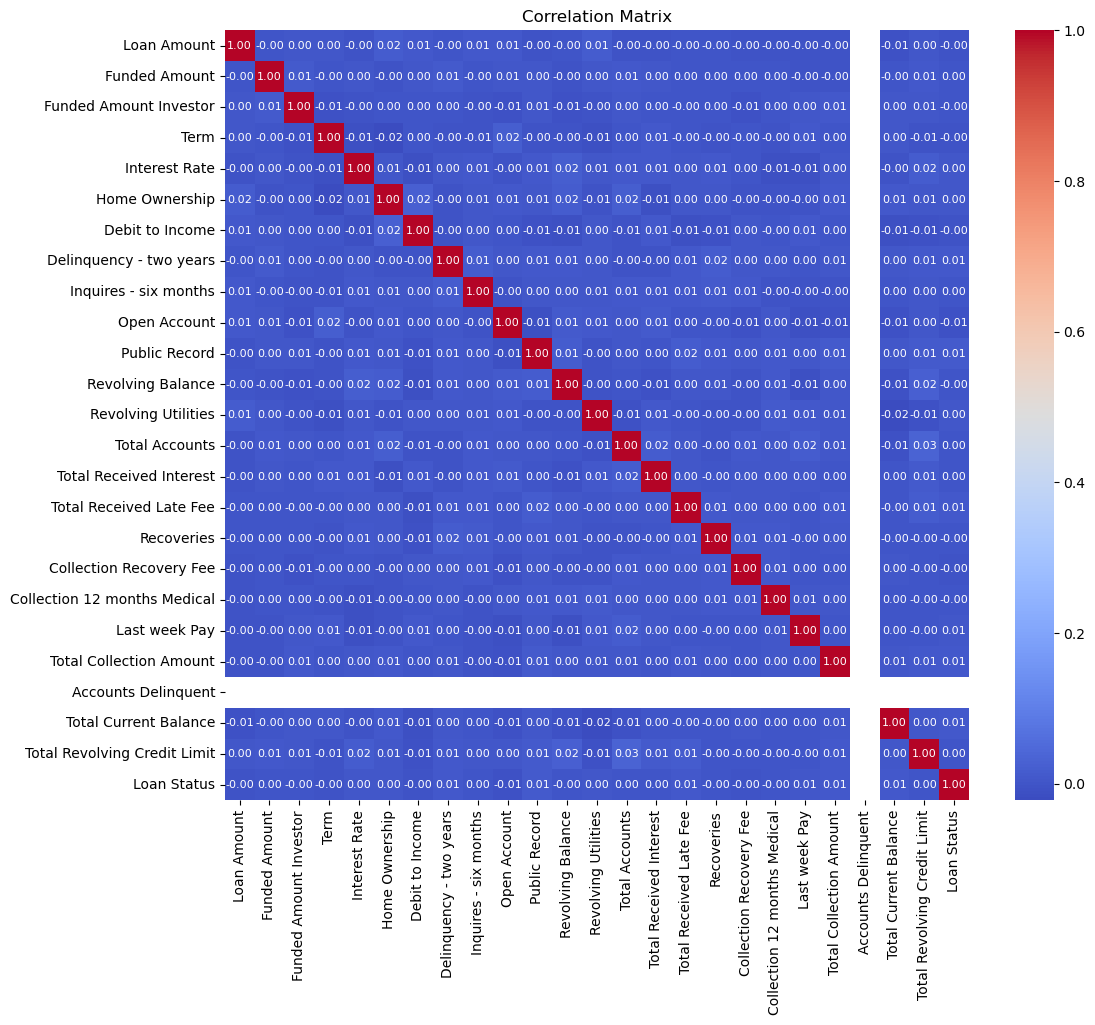

In [36]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = [ 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount','Accounts Delinquent',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']
cor = train_df[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
# Save the plot as PNG file
plt.savefig('correlation_matrix.png')
plt.show()

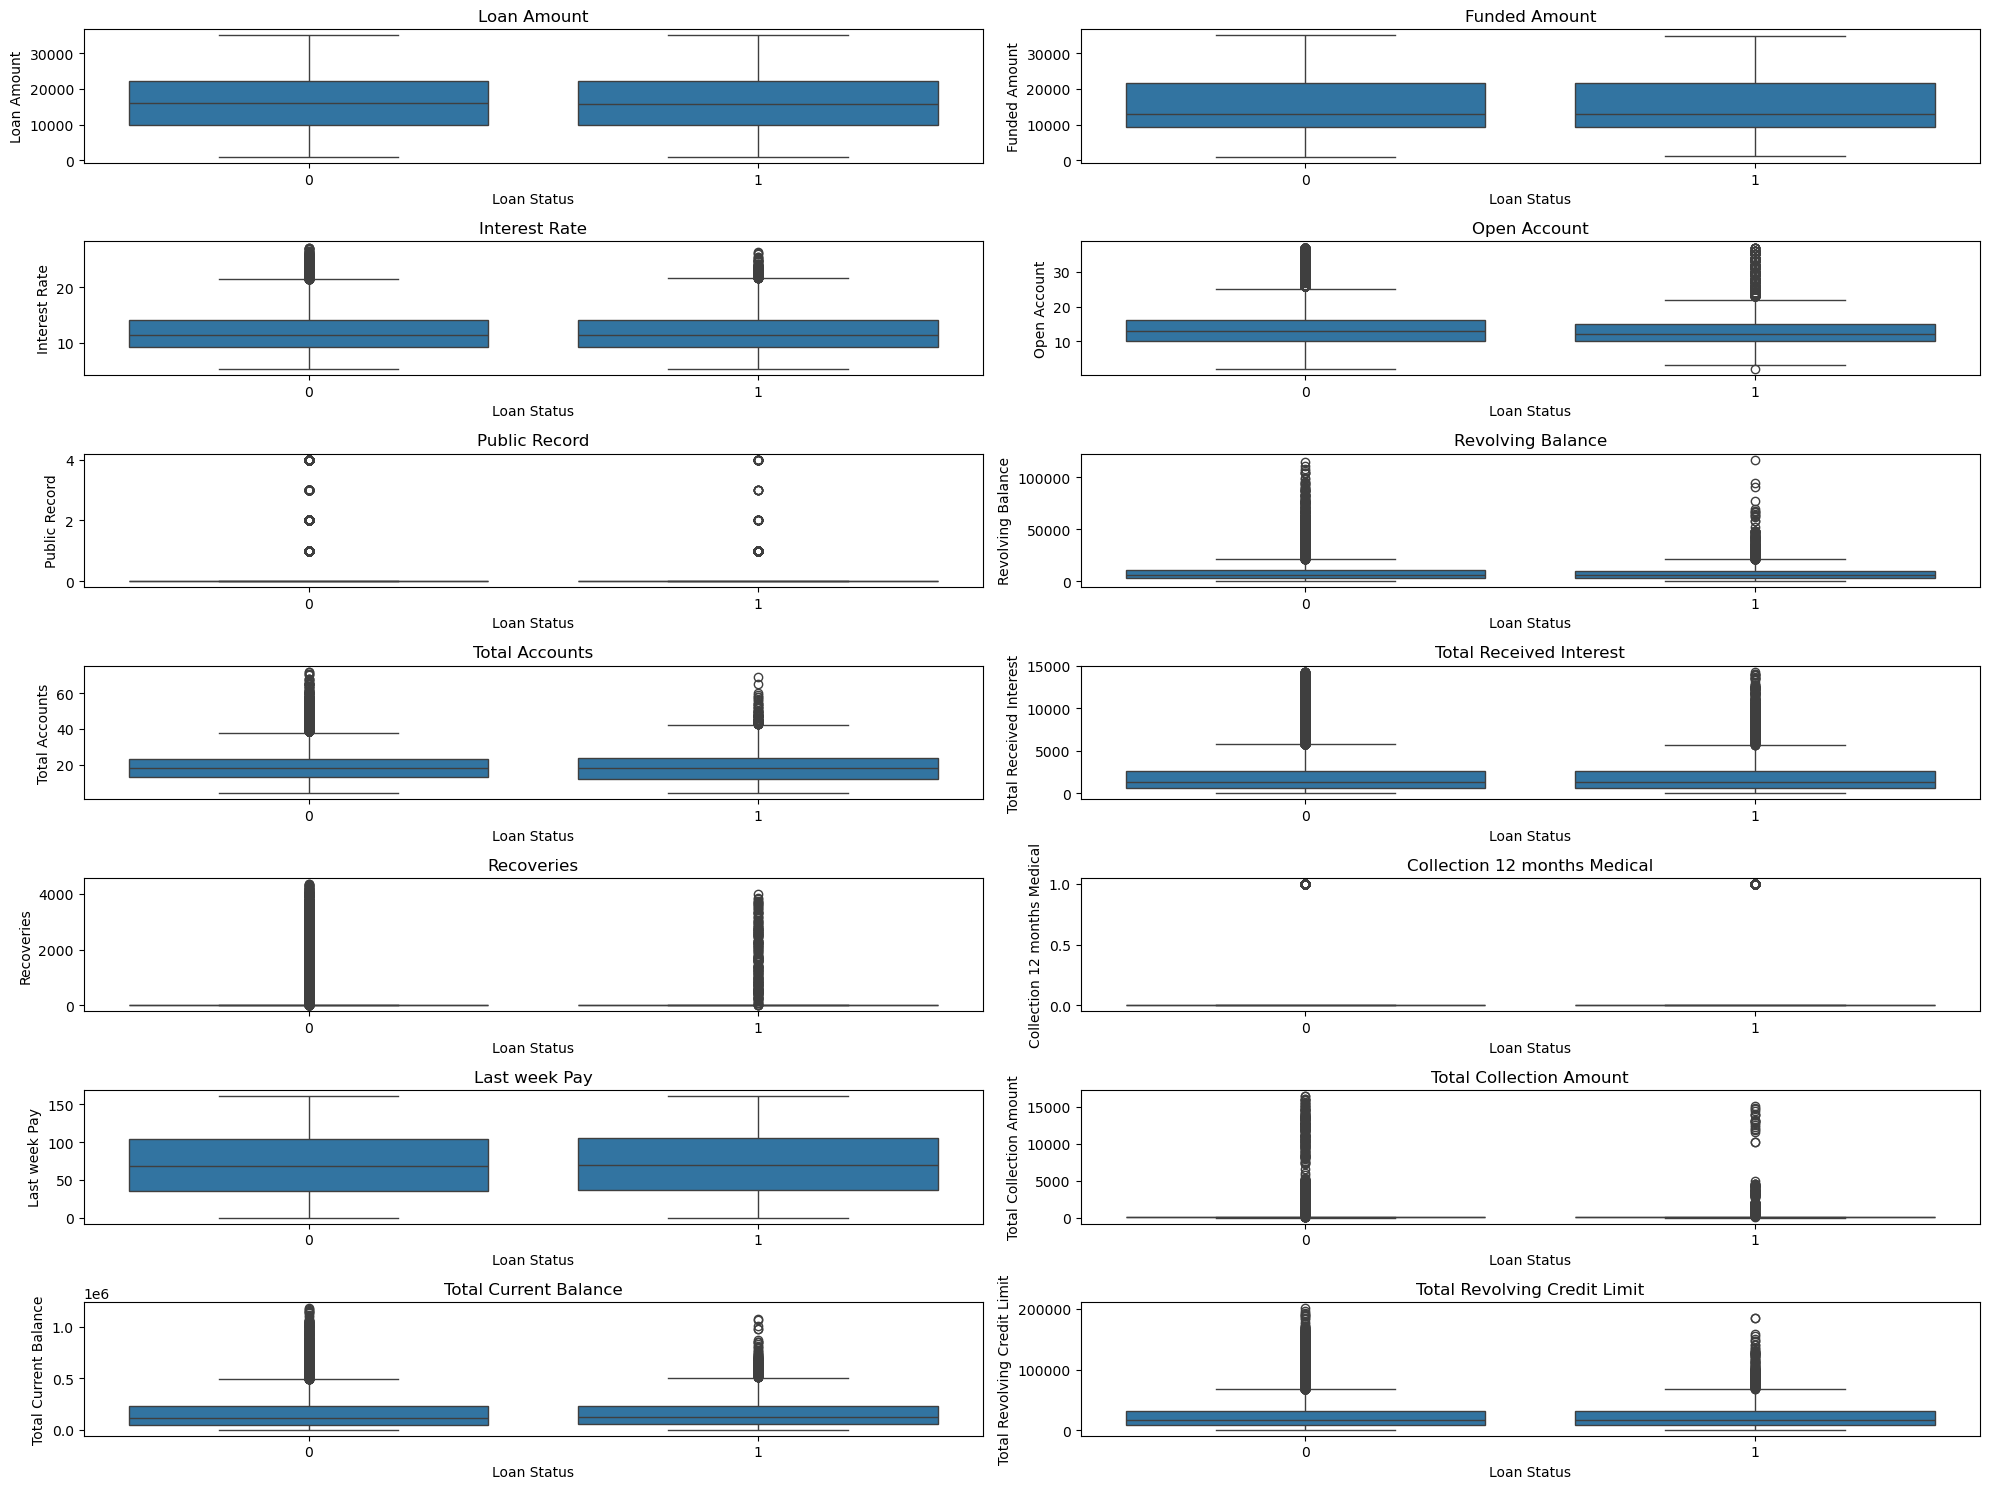

In [37]:
cols = ['Loan Amount', 'Funded Amount',  
       'Interest Rate',   'Open Account',
       'Public Record', 'Revolving Balance', 
       'Total Accounts', 'Total Received Interest', 
       'Recoveries',  'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit']
fig, axes = plt.subplots(nrows=7,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=train_df,x = 'Loan Status',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

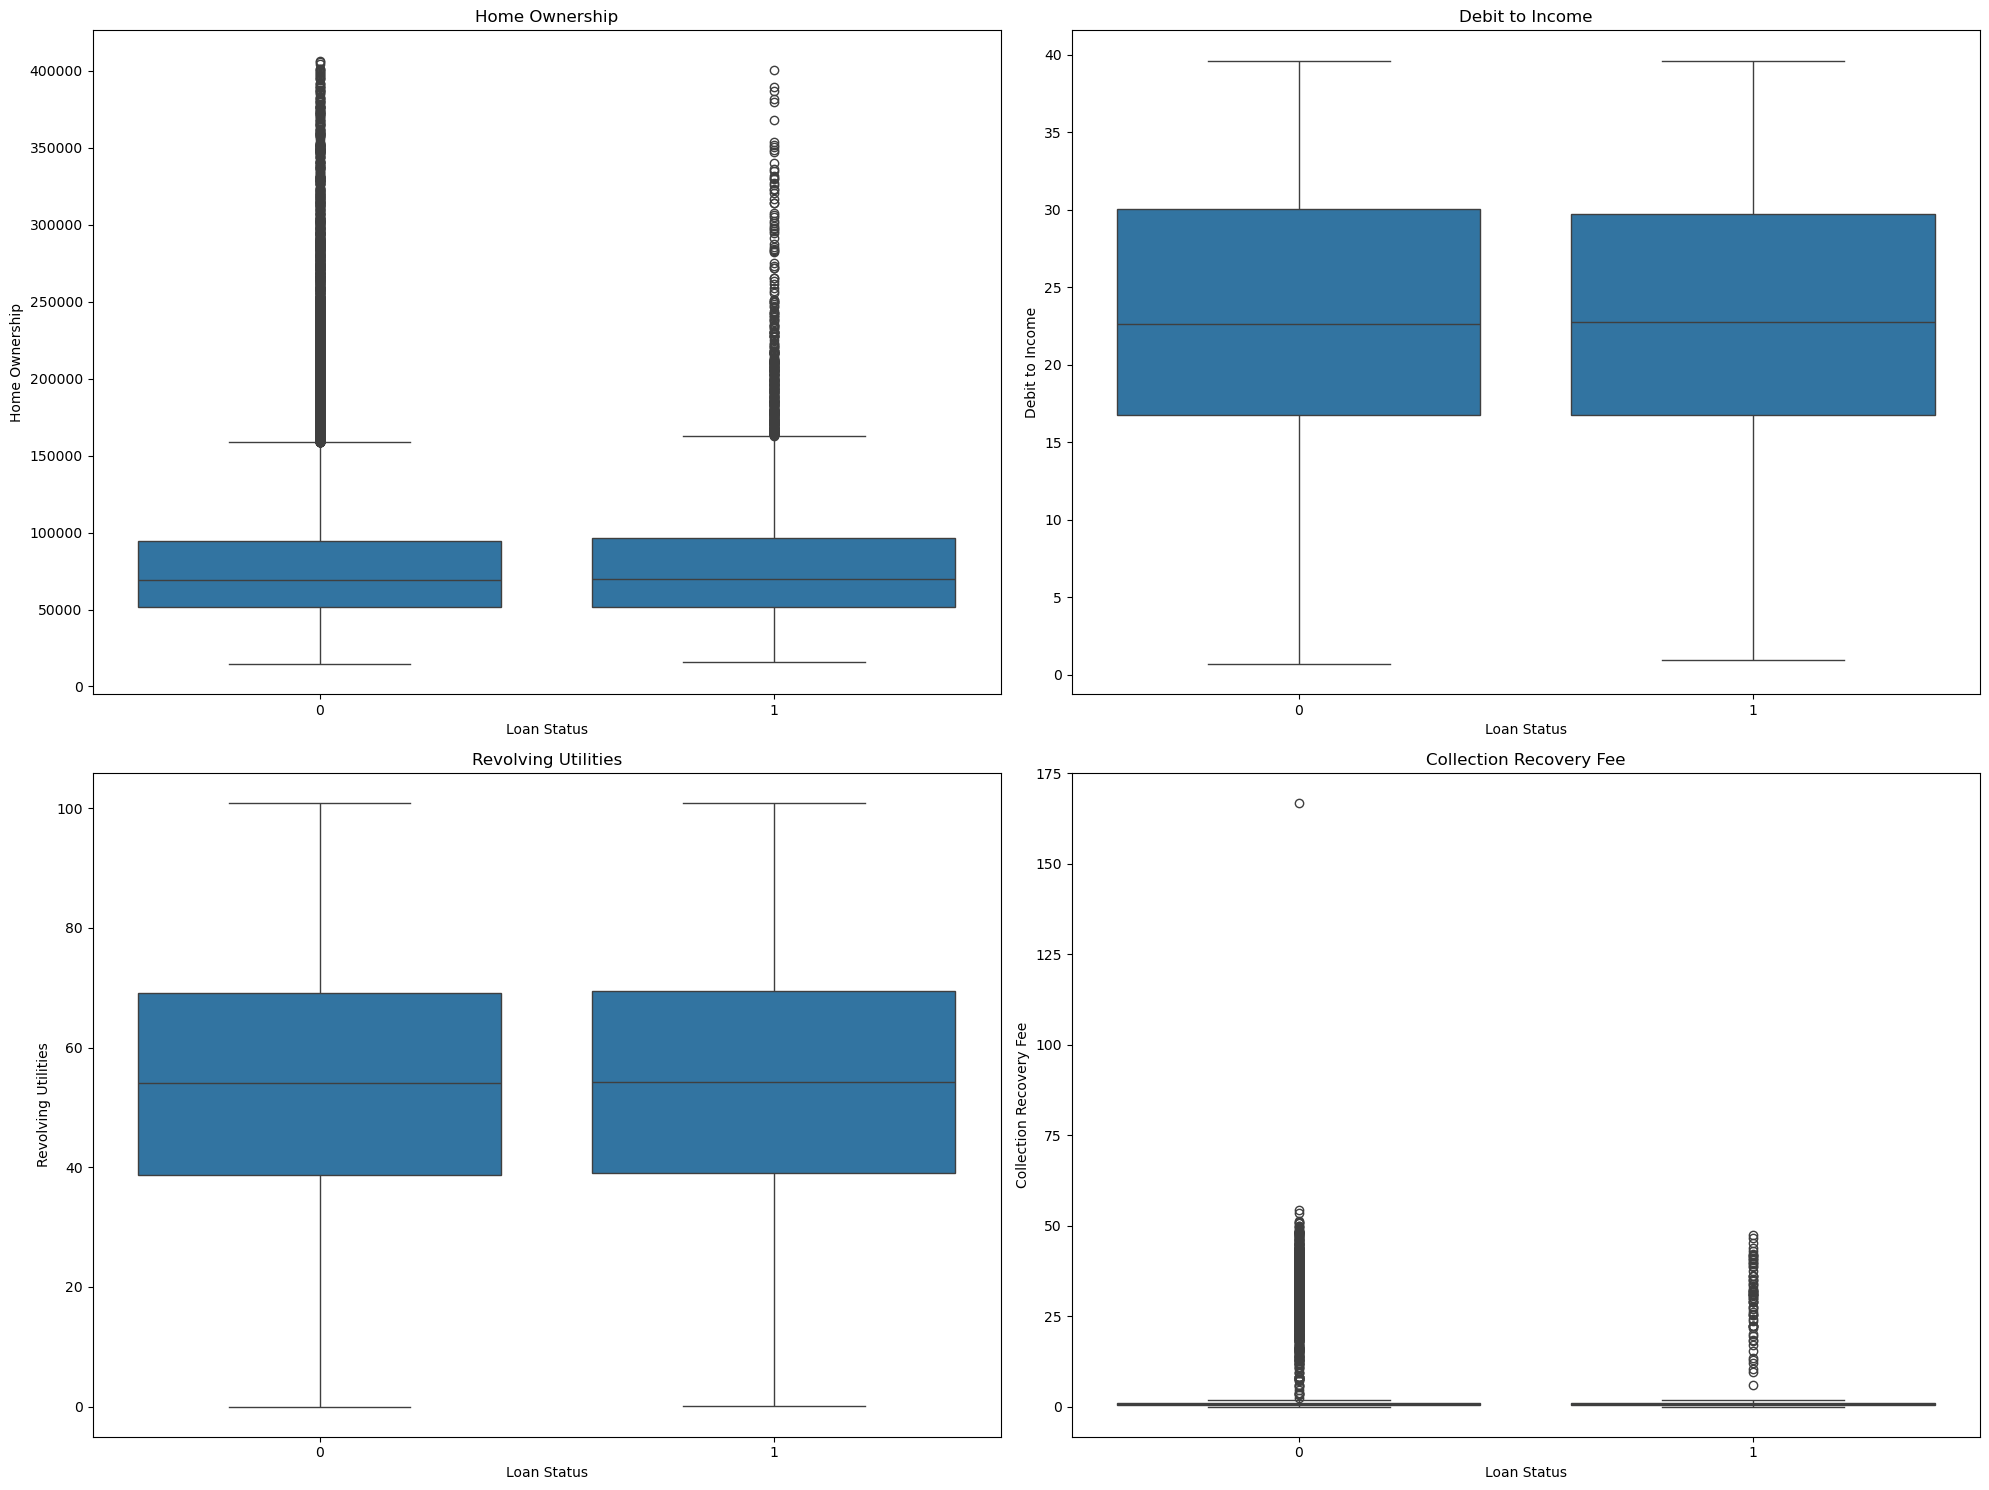

In [38]:
cols = ['Home Ownership', 'Debit to Income',
        'Revolving Utilities',
        'Collection Recovery Fee'  
       ]
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=train_df,x = 'Loan Status',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

In [39]:
def outlier_removal(df,columns):
    new_df = train_df.copy()
    for col in columns:
        col_values = train_df[col].values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
        col_iqr = q75 - q25
        print('iqr: {}'.format(col_iqr))

        cut_off = col_iqr * 3
        lower_bound,upper_bound = q25 - cut_off, q75 + cut_off
        print('Cut Off: {}'.format(cut_off))
        print('Lower Bound: {}'.format(lower_bound))
        print('Upper Bound: {}'.format(upper_bound))

        outliers = [x for x in col_values if x < lower_bound or x > upper_bound]
        print(f'Feature {col} Outliers: {len(outliers)}')
        new_df = new_df.drop(new_df[(new_df[col] > upper_bound) | (new_df[col] < lower_bound)].index)
        print('----' * 30)
    print('Number of Instances after outliers removal: {}'.format(new_df['Loan Status'].value_counts()))
    
    return new_df

In [40]:
cols = ['Revolving Balance']
train_df = outlier_removal(train_df,cols)

Quartile 25: 2557.0 | Quartile 75: 10184.5
iqr: 7627.5
Cut Off: 22882.5
Lower Bound: -20325.5
Upper Bound: 33067.0
Feature Revolving Balance Outliers: 934
------------------------------------------------------------------------------------------------------------------------
Number of Instances after outliers removal: Loan Status
0    60364
1     6165
Name: count, dtype: int64


In [41]:
train_df['Employment Duration'].value_counts()

Employment Duration
MORTGAGE    35852
RENT        23797
OWN          6880
Name: count, dtype: int64

In [42]:

#train_df.drop(['Loan Title','Grade'],axis= 1,inplace=True)

In [43]:
#identify the numerical columns
num_cols =train_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = train_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(train_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

In [44]:
#find the skewness of the numerical features
skewness = train_df[numerical_columns].skew()
print(skewness)

ID                               0.556853
Loan Amount                      0.289038
Funded Amount                    0.672459
Funded Amount Investor           0.991639
Term                            -6.392360
Interest Rate                    0.562072
Home Ownership                   2.132788
Debit to Income                  0.080662
Delinquency - two years          4.633681
Inquires - six months            3.708931
Open Account                     1.465050
Public Record                    6.240875
Revolving Balance                1.428792
Revolving Utilities             -0.237190
Total Accounts                   0.735303
Total Received Interest          2.132421
Total Received Late Fee          5.093994
Recoveries                       7.368346
Collection Recovery Fee         11.150285
Last week Pay                    0.260680
Total Collection Amount         12.933371
Total Current Balance            1.510650
Total Revolving Credit Limit     1.978090
dtype: float64


In [45]:
# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)

['Home Ownership', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']


In [46]:
# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    train_df[col] = np.log1p(train_df[col])

In [47]:
from scipy.stats import chi2_contingency
significance_level =0.05

for feature in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[feature], train_df['Loan Status'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Hypothesis testing
    if p < significance_level:
        print("Null hypothesis rejected. There is a significant association between", feature, "and the target feature.")
    else:
        print("Null hypothesis not rejected.There is no significant association between", feature, "and the target feature.")
    
    print()

Null hypothesis not rejected.There is no significant association between Batch Enrolled and the target feature.

Null hypothesis rejected. There is a significant association between Grade and the target feature.

Null hypothesis not rejected.There is no significant association between Sub Grade and the target feature.

Null hypothesis rejected. There is a significant association between Employment Duration and the target feature.

Null hypothesis not rejected.There is no significant association between Verification Status and the target feature.

Null hypothesis not rejected.There is no significant association between Payment Plan and the target feature.

Null hypothesis rejected. There is a significant association between Loan Title and the target feature.

Null hypothesis rejected. There is a significant association between Initial List Status and the target feature.

Null hypothesis not rejected.There is no significant association between Application Type and the target feature.



In [48]:
#identify the numerical columns
num_cols = train_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = train_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(train_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

In [49]:
# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(train_df[categorical_columns])
# Concatenate the original DataFrame with the encoded features along the columns axis
train_df = pd.concat([train_df, encoded_features], axis=1)
# Drop the original categorical columns if needed
train_df.drop(categorical_columns, axis=1, inplace=True) 

In [50]:
print(categorical_columns)

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')


In [51]:
def feature_scaling(dataset, num_cols):
    sc_x = StandardScaler()
    dataset[num_cols] = sc_x.fit_transform(dataset[num_cols])
    return dataset

final_train_df = feature_scaling(train_df, numerical_columns)

In [52]:
print(numerical_columns)

['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']


In [53]:
#First few entries from the final train dataset
final_train_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Loan Title_refi,Loan Title_refinance,Loan Title_refinance loan,Loan Title_relief,Loan Title_vacation,Loan Title_wedding loan,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,1.871048,-0.818337,2.018435,-0.338660,0.248314,-0.190864,1.869519,-0.830646,1.337948,-0.326875,...,False,False,False,False,False,False,False,True,True,False
1,-1.146390,-1.582044,-0.470418,-0.358930,0.248314,0.105872,-1.193299,-0.933891,-0.504593,-0.326875,...,False,False,False,False,False,False,True,False,True,False
2,-1.121783,1.365596,-0.792806,1.029795,0.248314,0.188852,0.518914,0.572174,-0.504593,-0.326875,...,False,False,False,False,False,False,False,True,True,False
3,-0.899765,-0.678525,-1.081840,0.479974,0.248314,1.315265,0.865539,-0.622466,1.337948,-0.326875,...,False,False,False,False,False,False,False,True,True,False
4,-0.534506,0.005000,-0.312719,-0.160029,0.248314,0.851573,-0.977561,-0.721154,1.337948,4.815124,...,False,False,False,False,False,False,False,True,True,False


In [54]:
#Shape of the final train dataset
final_train_df.shape

(66529, 203)

In [55]:
#Define the classifiers
classifiers ={'Logistic_Regression':LogisticRegression(),
              'K_Neighbors':KNeighborsClassifier(),
              'RandomForest_Classifier':RandomForestClassifier(n_jobs=-1),
              'Gradient_Boosting':GradientBoostingClassifier(),
              'XGBoost' : XGBClassifier()
               }

In [56]:
from sklearn.model_selection import train_test_split
X = final_train_df.drop('Loan Status',axis= 1)
y = final_train_df['Loan Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=124,stratify=y)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46570, 202)
(19959, 202)
(46570,)
(19959,)


In [58]:
y_train.value_counts(normalize=True)

Loan Status
0    0.907344
1    0.092656
Name: proportion, dtype: float64

In [59]:
#Create an empty dataframe to store scores for various algorithms

score_card = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
score_card1 = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
#update the result table for all the scores
#Performance measure considered for model comparison are AUC score,Precision,Recall,Accuracy,F1-score.
#compile the required information in a user defined function
def update_score_card(model,accuracy,recall,precision,AUC_score,f1):
    global score_card
    new_score_card = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card = pd.concat([score_card,new_score_card],ignore_index=True)
    
def update_score_card1(model,accuracy,recall,precision,AUC_score,f1):
    global score_card1
    new_score_card1 = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card1 = pd.concat([score_card1,new_score_card1],ignore_index=True)

In [60]:
for key, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Original_dataset'
    update_score_card1(key,accuracy,recall,precision,roc_auc,f1)     

In [61]:
score_card1

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ Original_dataset,0.907310,0.000000,0.000000,0.500000,0.000000
1,K_Neighbors+ Original_dataset,0.902300,0.006486,0.096774,0.500151,0.012158
2,RandomForest_Classifier+ Original_dataset,0.907310,0.000000,0.000000,0.500000,0.000000
3,Gradient_Boosting+ Original_dataset,0.907310,0.000000,0.000000,0.500000,0.000000
4,XGBoost+ Original_dataset,0.906108,0.001081,0.071429,0.499823,0.002130


In [62]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [63]:
model = LogisticRegression(class_weight='balanced')

In [64]:
print(y_train.value_counts())

Loan Status
0    42255
1     4315
Name: count, dtype: int64


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [66]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [67]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_probs))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69     18109
           1       0.09      0.46      0.16      1850

    accuracy                           0.54     19959
   macro avg       0.50      0.50      0.42     19959
weighted avg       0.83      0.54      0.64     19959

ROC AUC Score: 0.5036037627997427


In [68]:
smote = SMOTE(random_state= 24)
# Loop through each classifier and evaluate its performance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ SMOTE'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)

In [69]:
undersampler = RandomUnderSampler(random_state=24)
# Loop through each classifier and evaluate its performance
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_undersampled, y_train_undersampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Undersampling'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)   

In [70]:
oversampler = RandomOverSampler(random_state=24)
# Loop through each classifier and evaluate its performance
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_oversampled, y_train_oversampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Oversampling'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)

In [71]:
sorted_score_card = score_card.sort_values(by='f1-score', ascending=False)
sorted_score_card.style.highlight_max(color = 'pink', axis = 0)

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
13,Gradient_Boosting+ Oversampling,0.572975,0.462703,0.102087,0.523471,0.167269
8,Gradient_Boosting+ Undersampling,0.504184,0.529730,0.097941,0.515652,0.165317
9,XGBoost+ Undersampling,0.516158,0.508649,0.097120,0.512787,0.163099
7,RandomForest_Classifier+ Undersampling,0.533243,0.480000,0.096083,0.509341,0.160115
6,K_Neighbors+ Undersampling,0.510897,0.500000,0.094755,0.506005,0.159318
10,Logistic_Regression+ Oversampling,0.545568,0.458378,0.095110,0.506427,0.157533
5,Logistic_Regression+ Undersampling,0.512701,0.485946,0.092930,0.500690,0.156022
11,K_Neighbors+ Oversampling,0.707651,0.254595,0.095596,0.504265,0.139000
14,XGBoost+ Oversampling,0.766121,0.187027,0.098575,0.506154,0.129104
1,K_Neighbors+ SMOTE,0.798988,0.147568,0.100812,0.506552,0.119789


In [72]:
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()


voting_classifier = VotingClassifier(estimators=[('lr', logistic_regressor), ('gb', gb_classifier)], voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.5340948945337943
The recall is: 0.49891891891891893
The precision is: 0.0993006993006993
The ROC_AUC is: 0.5183036805649871
The f1-Score is: 0.16563481381785555


In [73]:
from sklearn.ensemble import VotingClassifier
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()
ada_classifier = AdaBoostClassifier()
xgb = XGBClassifier()

voting_classifier = VotingClassifier(estimators=[('gb', gb_classifier), ('lr', logistic_regressor),('xgb',xgb)], 
                                     voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.6324465153564808
The recall is: 0.3551351351351351
The precision is: 0.09661764705882353
The ROC_AUC is: 0.5079557723276316
The f1-Score is: 0.15190751445086706


In [74]:
from sklearn.ensemble import VotingClassifier
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()
ada_classifier = AdaBoostClassifier()
xgb = XGBClassifier()

voting_classifier = VotingClassifier(estimators=[('xgb',xgb),
                                                  ('lr', logistic_regressor)], voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.7151159877749387
The recall is: 0.2524324324324324
The precision is: 0.09790356394129979
The ROC_AUC is: 0.5074078888651753
The f1-Score is: 0.14108761329305136


In [75]:
# Define the base classifiers
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)

#Ensemble model combining logistic regression and XGBoost with soft voting.
voting_classifier = VotingClassifier(estimators=[('lr', lr),('xgb',xgb)], voting='soft')

# Perform stratified k-fold cross-validation predictions on the training dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(voting_classifier, X_train_oversampled, y_train_oversampled, cv=skf)

# Print classification report and confusion matrix for cross-validated predictions
print("Classification Report for Cross-Validated Predictions:")
print(classification_report(y_train_oversampled, y_pred_cv))

Classification Report for Cross-Validated Predictions:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     42255
           1       0.82      0.89      0.86     42255

    accuracy                           0.85     84510
   macro avg       0.85      0.85      0.85     84510
weighted avg       0.85      0.85      0.85     84510



In [76]:
# Train the model on the entire training dataset
voting_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test dataset
y_pred_test = voting_classifier.predict(X_test)

# Evaluate the model's performance on the test dataset
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     18109
           1       0.10      0.21      0.14      1850

    accuracy                           0.75     19959
   macro avg       0.51      0.51      0.50     19959
weighted avg       0.83      0.75      0.79     19959



In [77]:
#Finding the best parameters for logistic regression
logistic_regressor = LogisticRegression()
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10] }
# Define GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(estimator=logistic_regressor, param_grid=param_grid_lr, scoring='f1', cv=5)
# Fit GridSearchCV for the classifier
grid_search_lr.fit(X_train_selected, y_train_oversampled)

# Get best hyperparameters and best estimators
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

In [78]:
print(best_params_lr)

{'C': 0.1, 'penalty': 'l2'}


In [79]:
#Finding the best parameters for XGBoost
xgb = XGBClassifier()
param_grid_xgb = {
    'n_estimators': [100,300,500],
    'max_depth': [3,5,7],
    'learning_rate': [0.1, 0.01]
}

# Define GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='f1', cv=5)
grid_search_xgb.fit(X_train_selected, y_train_oversampled)

# Get best hyperparameters and best estimators
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

In [80]:
print(best_params_xgb)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


In [81]:
#Create a new VotingClassifier with the best estimators obtained
voting_classifier_tuned = VotingClassifier(estimators=[
    ('xgb', best_estimator_xgb),
    ('lr', best_estimator_lr)
], voting='soft')

# Finally, fit the tuned voting classifier and evaluate its performance
voting_classifier_tuned.fit(X_train_oversampled, y_train_oversampled)
y_predictions_tuned = voting_classifier_tuned.predict(X_test)

In [82]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_predictions_tuned)
recall = recall_score(y_test, y_predictions_tuned)
precision = precision_score(y_test, y_predictions_tuned)
AUC_score = roc_auc_score(y_test, y_predictions_tuned)
f1 = f1_score(y_test, y_predictions_tuned)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("AUC Score:", AUC_score)
print("F1 Score:", f1)

Accuracy: 0.8564557342552233
Recall: 0.06972972972972973
Precision: 0.10133542812254517
AUC Score: 0.5032783609165519
F1 Score: 0.08261287223823247


In [83]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
report = classification_report(y_test,y_predictions_tuned,target_names=target_names)
print(report)

              precision    recall  f1-score   support

 Negative(0)       0.91      0.94      0.92     18109
 Positive(1)       0.10      0.07      0.08      1850

    accuracy                           0.86     19959
   macro avg       0.50      0.50      0.50     19959
weighted avg       0.83      0.86      0.84     19959



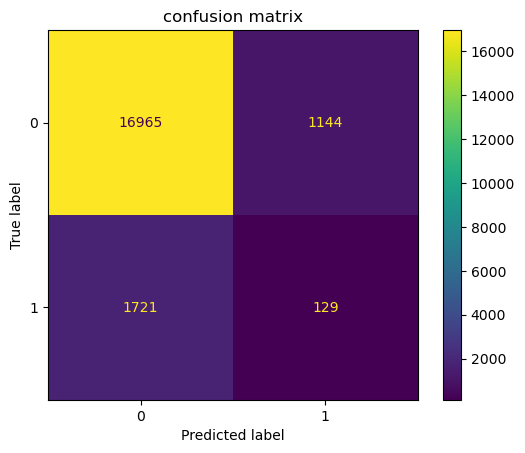

In [84]:
#checking the accuracy on the testing dataset using confusion matrix
cm = confusion_matrix(y_test,y_predictions_tuned)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=voting_classifier_tuned.classes_)
display.plot()
# Save the plot as PNG file
plt.savefig('confusion_matrix.png')
plt.title('confusion matrix')
plt.show()

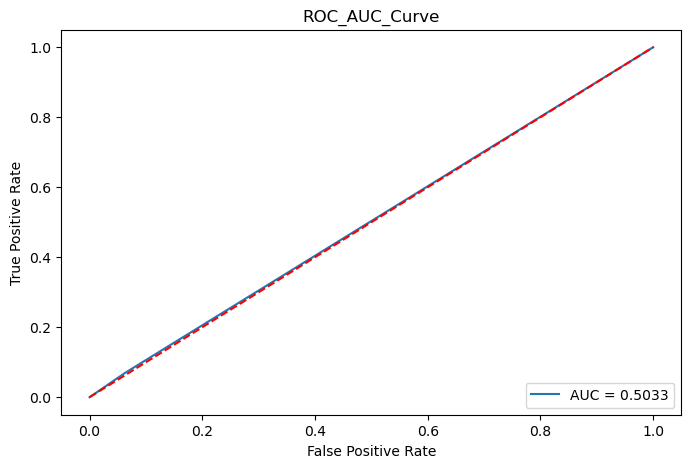

In [85]:
# Plot ROC curve
#Using ROC Curve we are checking the accuracy on the testing dataset
fpr, tpr, thresholds = roc_curve(y_test,y_predictions_tuned)
auc = round(roc_auc_score(y_test,y_predictions_tuned),4)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {auc}')
# Add threshold line at 0.50
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# Save the plot as PNG file
plt.savefig('ROC_AUC_Curve.png')
plt.title('ROC_AUC_Curve')
plt.show()

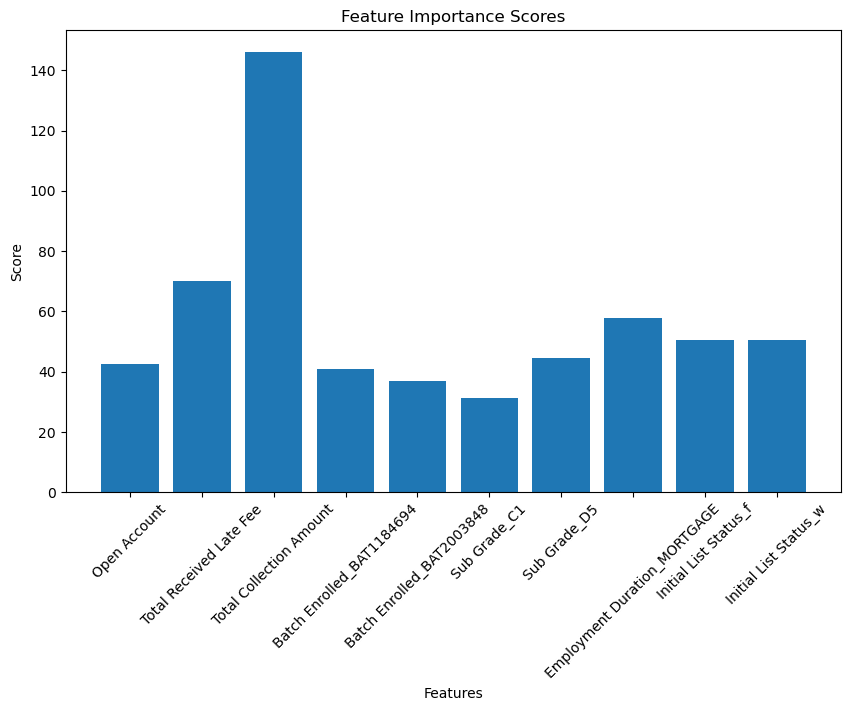

In [86]:
# Access the selected features
selected_features_indices = selector.get_support()
selected_features = X_train.columns[selected_features_indices]

# Assuming you already have selected_features from the previous code snippet
feature_scores = selector.scores_[selected_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [87]:
test_df = pd.read_csv(r"test.csv")

In [88]:
test_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [89]:
#Shape of the dataset
test_df.shape

(28913, 35)

In [90]:
#Basic information about the features in the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [91]:
#Descriptive statistics for numerical features in the dataset
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28913.0,2.944966e+07,2.206842e+07,1.297893e+06,8.272049e+06,2.596622e+07,4.855801e+07,7.226845e+07
Loan Amount,28913.0,1.640403e+04,8.358898e+03,1.000000e+03,9.776000e+03,1.560000e+04,2.165100e+04,3.500000e+04
Funded Amount,28913.0,1.561991e+04,8.229978e+03,1.000000e+03,9.175000e+03,1.320000e+04,2.155200e+04,3.500000e+04
Funded Amount Investor,28913.0,1.474154e+04,7.230398e+03,1.000000e+03,9.695446e+03,1.293060e+04,1.922640e+04,3.500000e+04
Term,28913.0,5.454308e+01,8.991800e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,6.000000e+01
Interest Rate,28913.0,1.218758e+01,3.911259e+00,5.320000e+00,9.422042e+00,1.168865e+01,1.464000e+01,2.731000e+01
Home Ownership,28913.0,7.998375e+04,4.523132e+04,1.490793e+04,5.079100e+04,6.889432e+04,9.468494e+04,4.069449e+05
Debit to Income,28913.0,2.215927e+01,8.657629e+00,7.300000e-01,1.562289e+01,2.153000e+01,2.884000e+01,3.962998e+01
Delinquency - two years,28913.0,3.320652e-01,8.188691e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
Inquires - six months,28913.0,2.768997e-01,6.639989e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [92]:
if 'Loan Status' in test_df.columns:
    test_df.drop(columns=['Loan Status'], inplace=True)
else:
    print("Column 'Loan Status' not found in DataFrame.")

In [93]:
#Descriptive statistics for categorical features in the dataset
test_df.describe(include=["O"]).T

,count,unique,top,freq
Batch Enrolled,28913,41,BAT3873588,1623
Grade,28913,7,C,8104
Sub Grade,28913,35,B4,1902
Employment Duration,28913,3,MORTGAGE,15530
Verification Status,28913,3,Source Verified,13626
Payment Plan,28913,1,n,28913
Loan Title,28913,109,Debt consolidation,12259
Initial List Status,28913,2,w,15848
Application Type,28913,2,INDIVIDUAL,28883


In [94]:
#columns in the dataset
test_df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

Text(0, 0.5, 'Count')

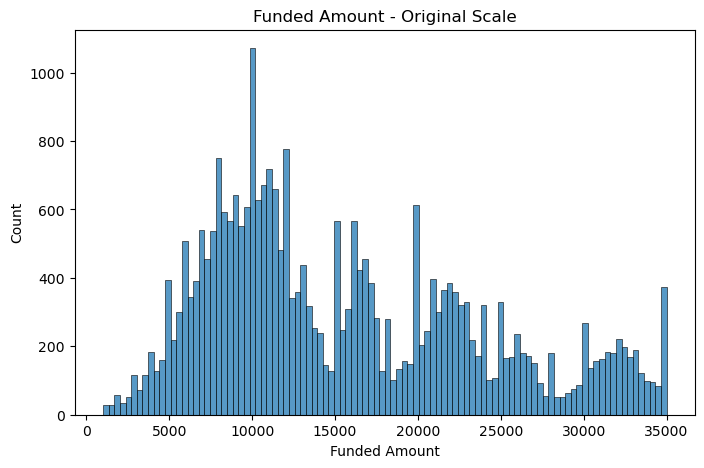

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df, x='Funded Amount', bins=100)
plt.title('Funded Amount - Original Scale')
plt.xlabel('Funded Amount')
plt.ylabel('Count')

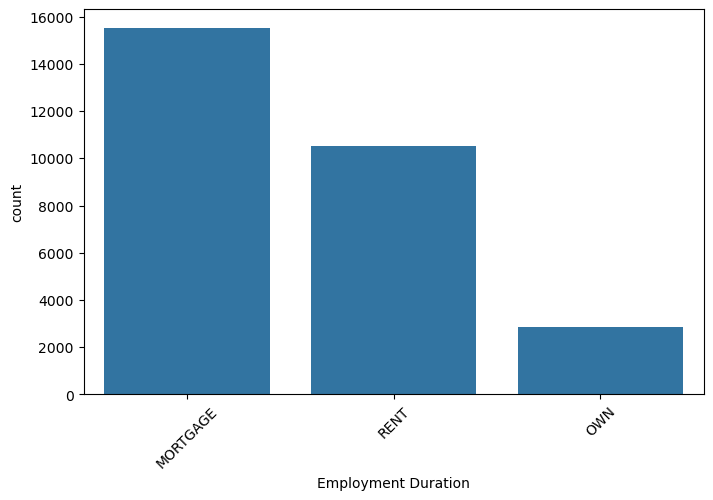

In [96]:
test_df['Employment Duration'].value_counts()


# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort based on the count values of emp_length column
sorted_categories = test_df['Employment Duration'].value_counts().index
sns.countplot(data=test_df, x='Employment Duration',order=sorted_categories)
plt.xticks(rotation=45)
plt.show()

In [97]:
test_df['Loan Title'].nunique()

109

In [98]:
test_df['Loan Title'] = test_df['Loan Title'].str.lower()
test_df['Loan Title'].nunique()

83

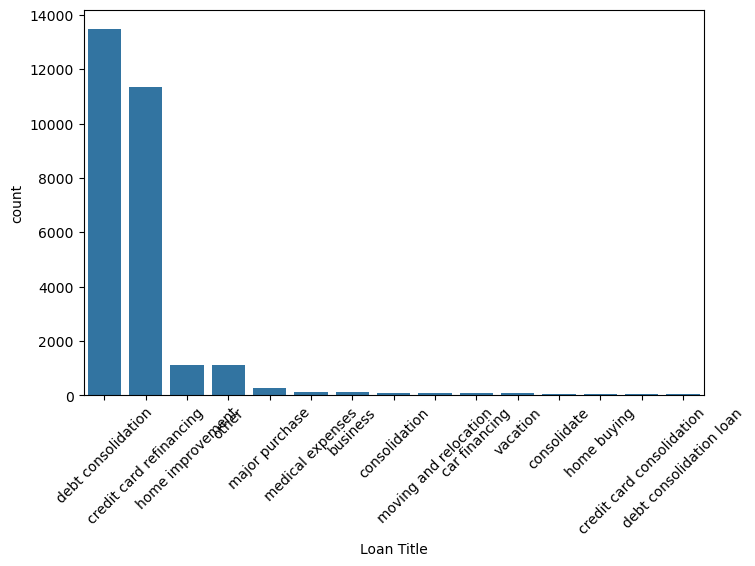

In [99]:
# Determine the top values in the column you're interested in
top_values = test_df['Loan Title'].value_counts().nlargest(15).index
top_values

# Plot the countplot on the axis
plt.figure(figsize=(8,5))
sns.countplot(data=test_df,x='Loan Title',order=top_values)
plt.xticks(rotation=45)
plt.show()

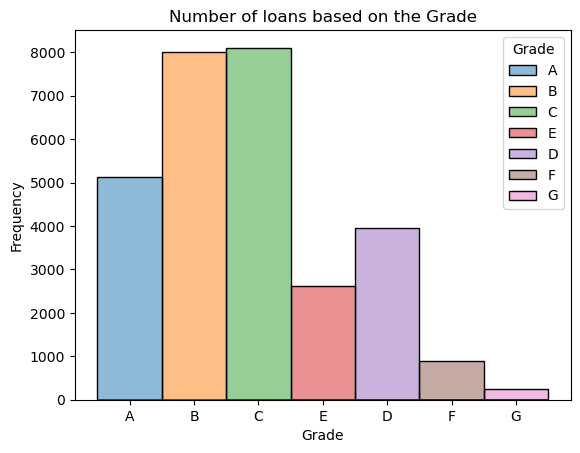

In [100]:
sns.histplot(x='Grade', hue="Grade",data=test_df)
plt.title("Number of loans based on the Grade")
plt.ylabel('Frequency');

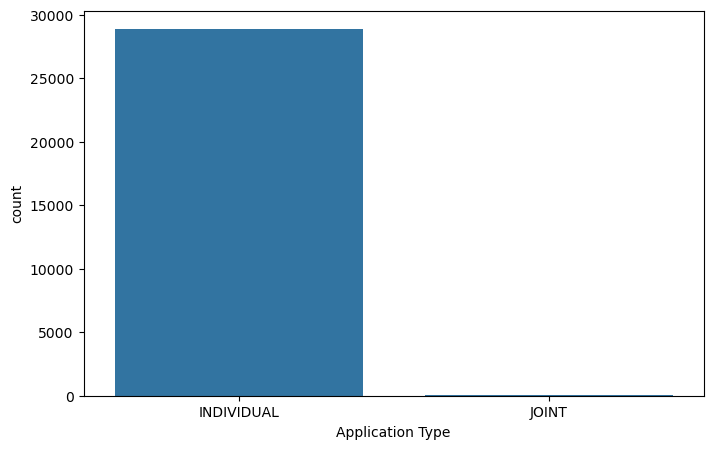

In [101]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Application Type'].value_counts().index
sns.countplot(data=test_df, x='Application Type',order=sorted_counts)
plt.show()

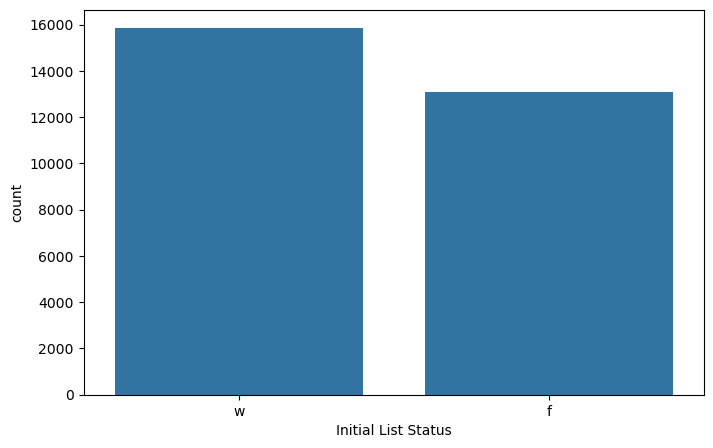

In [102]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Initial List Status'].value_counts().index
sns.countplot(data=test_df, x='Initial List Status',order=sorted_counts)
plt.show()

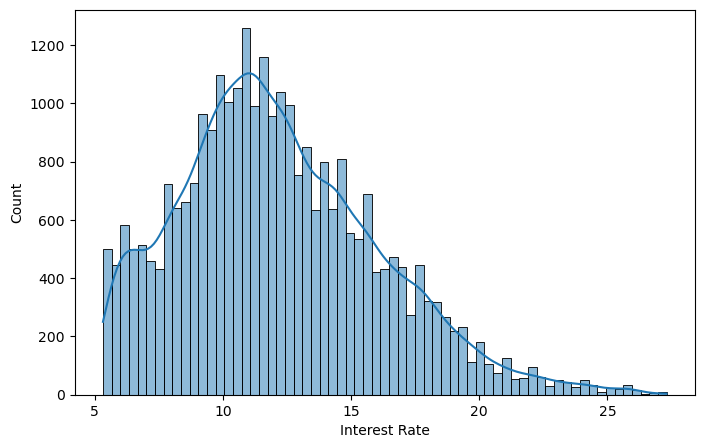

In [103]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Interest Rate',kde=True)
plt.show()

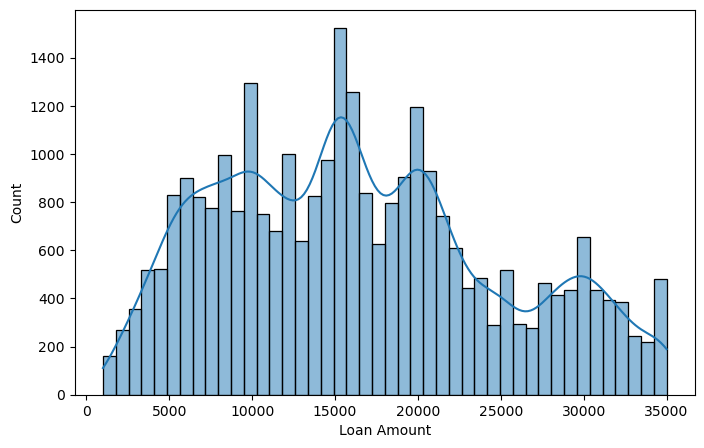

In [104]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Loan Amount',kde=True)
plt.show()

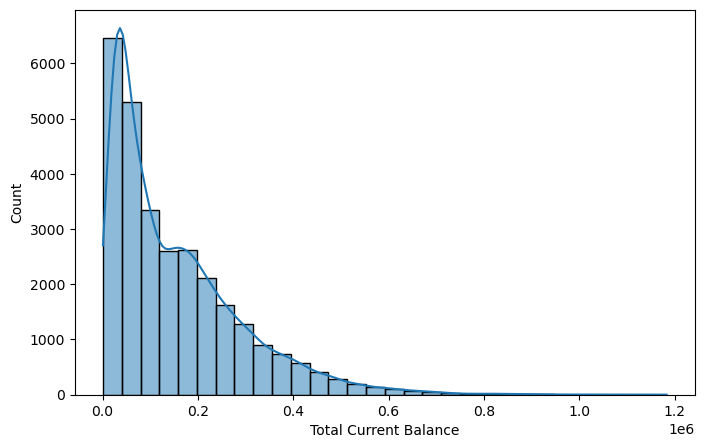

In [105]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Total Current Balance',kde=True,bins=30)
plt.show()

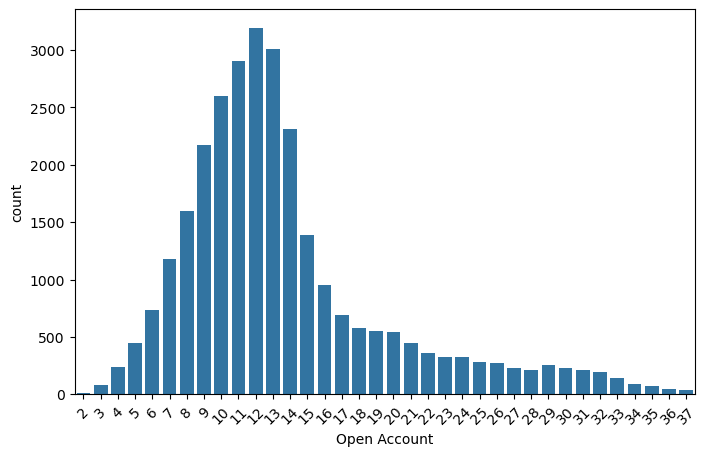

In [106]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
sns.countplot(data=test_df,x='Open Account')
plt.xticks(rotation=45)
plt.show()

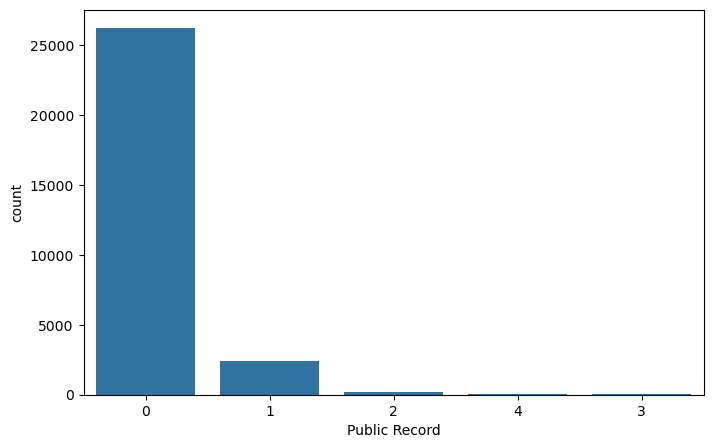

In [107]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Public Record'].value_counts().index
sns.countplot(data=test_df, x='Public Record',order=sorted_counts)
plt.show()

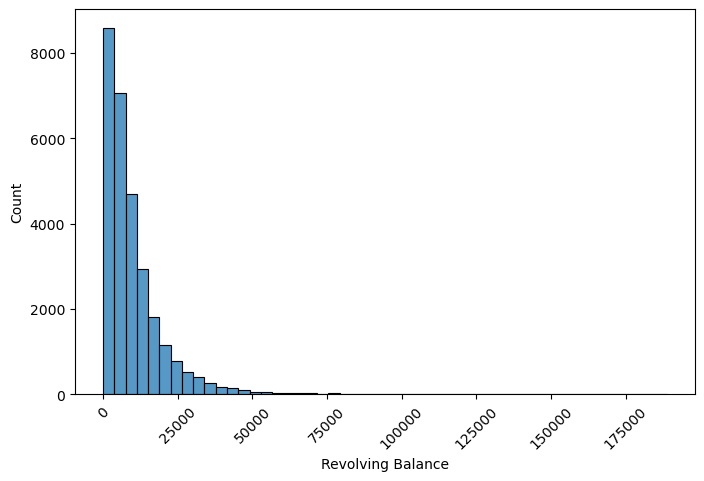

In [108]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Revolving Balance',bins=50)
plt.xticks(rotation=45)
plt.show()

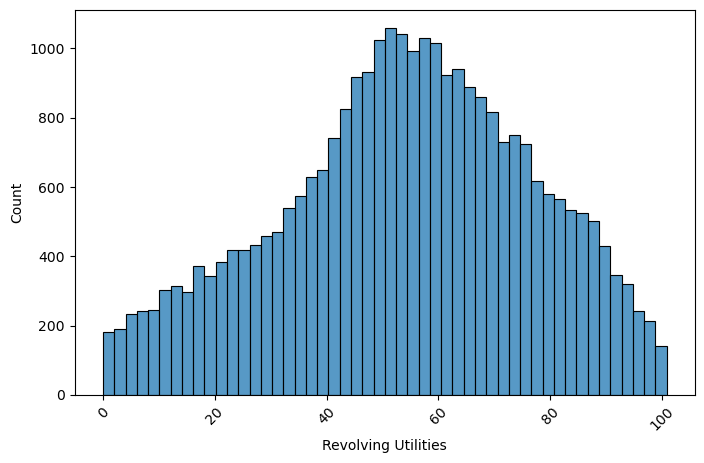

In [109]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Revolving Utilities',bins=50)
plt.xticks(rotation=45)
plt.show()

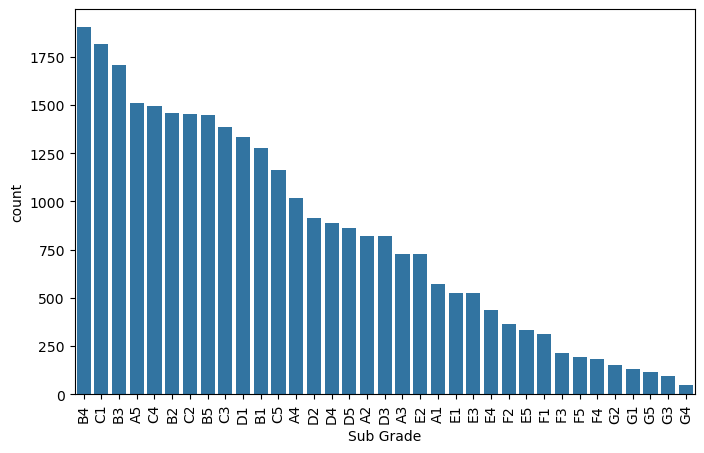

In [110]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Sub Grade'].value_counts().index
sns.countplot(data=test_df, x='Sub Grade',order=sorted_counts)
plt.xticks(rotation=90)
plt.show()

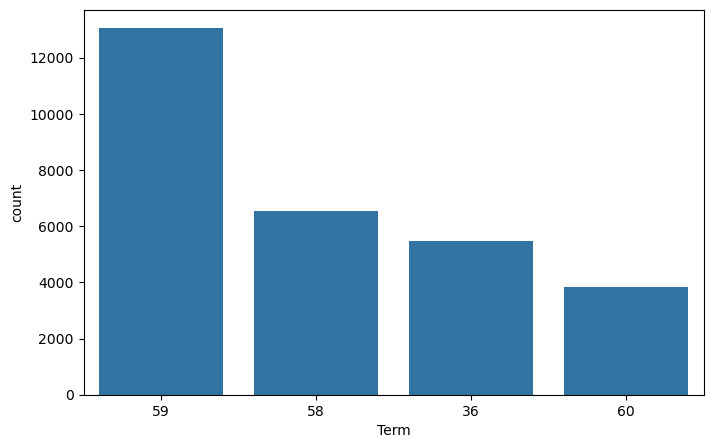

In [111]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Term'].value_counts().index
sns.countplot(data=test_df, x='Term',order=sorted_counts)
plt.show()

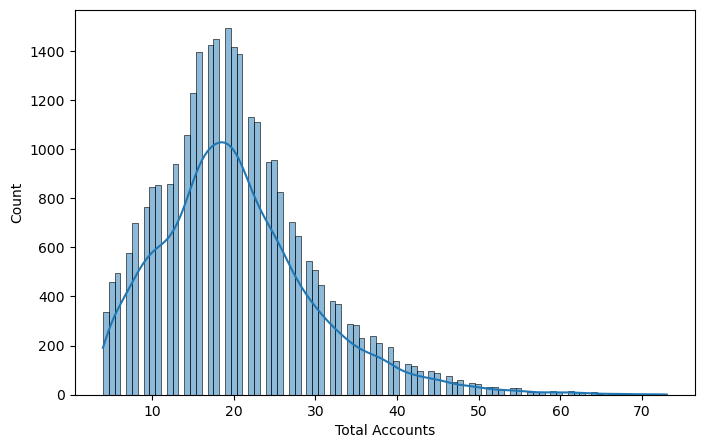

In [112]:
# Plot the histogram on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='Total Accounts',kde=True)
plt.show()

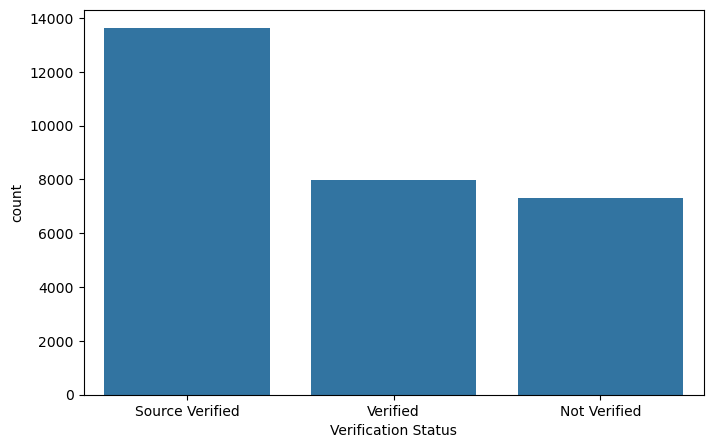

In [113]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['Verification Status'].value_counts().index
sns.countplot(data=test_df, x='Verification Status',order=sorted_counts)
plt.show()

In [114]:
missing_percentage = test_df.isnull().sum() / len(test_df) * 100
print(missing_percentage)

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

In [115]:
test_df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [116]:
#identify the numerical columns
num_cols = test_df._get_numeric_data().columns
num_cols

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [117]:
missing_percentage =test_df.isnull().sum() / len(test_df) * 100
print(missing_percentage)

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

In [118]:
#checking for duplicates
num_duplicates = test_df.duplicated().sum()
num_duplicates

0

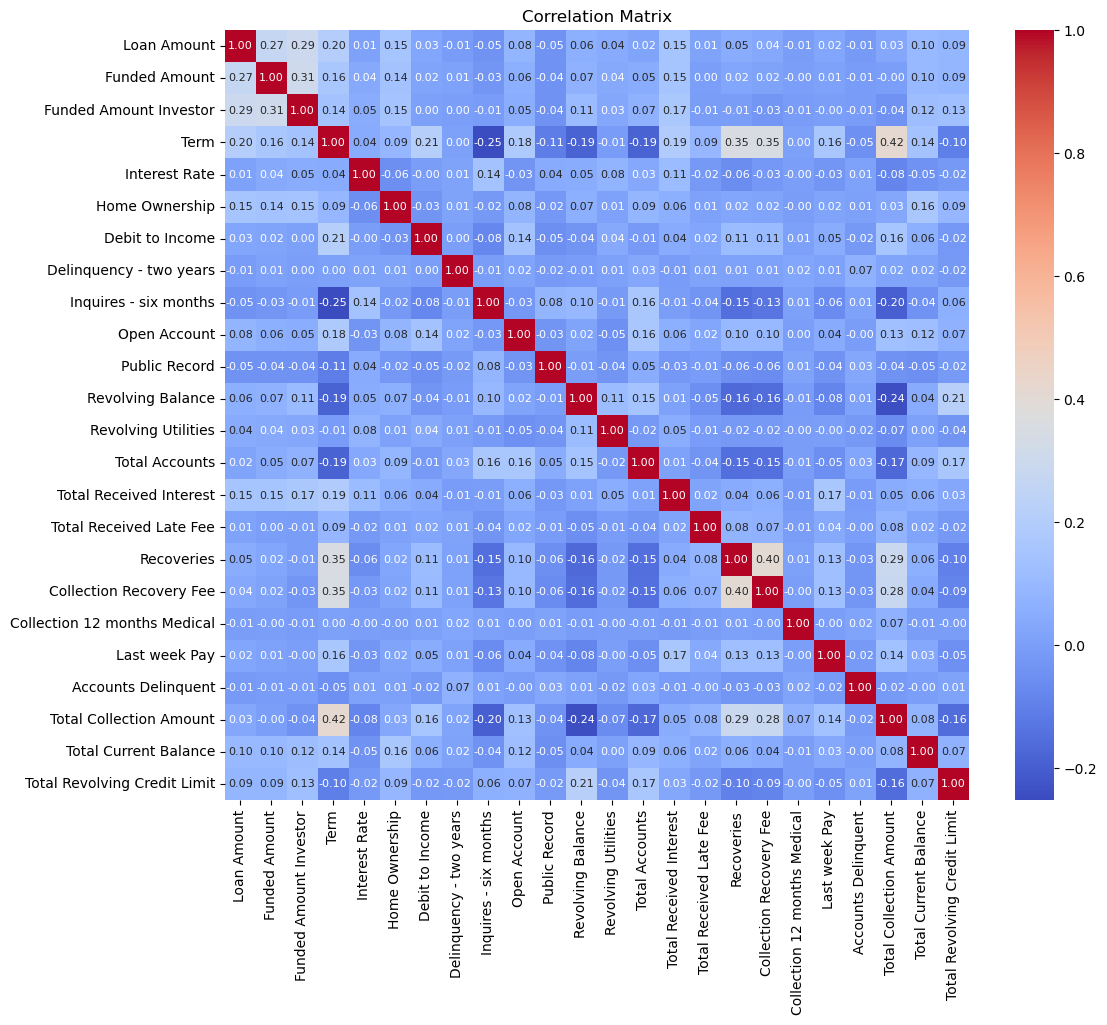

In [140]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay','Accounts Delinquent','Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit']
cor = test_df[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
# Save the plot as PNG file
plt.savefig('correlation_matrix_test.png')
plt.show()

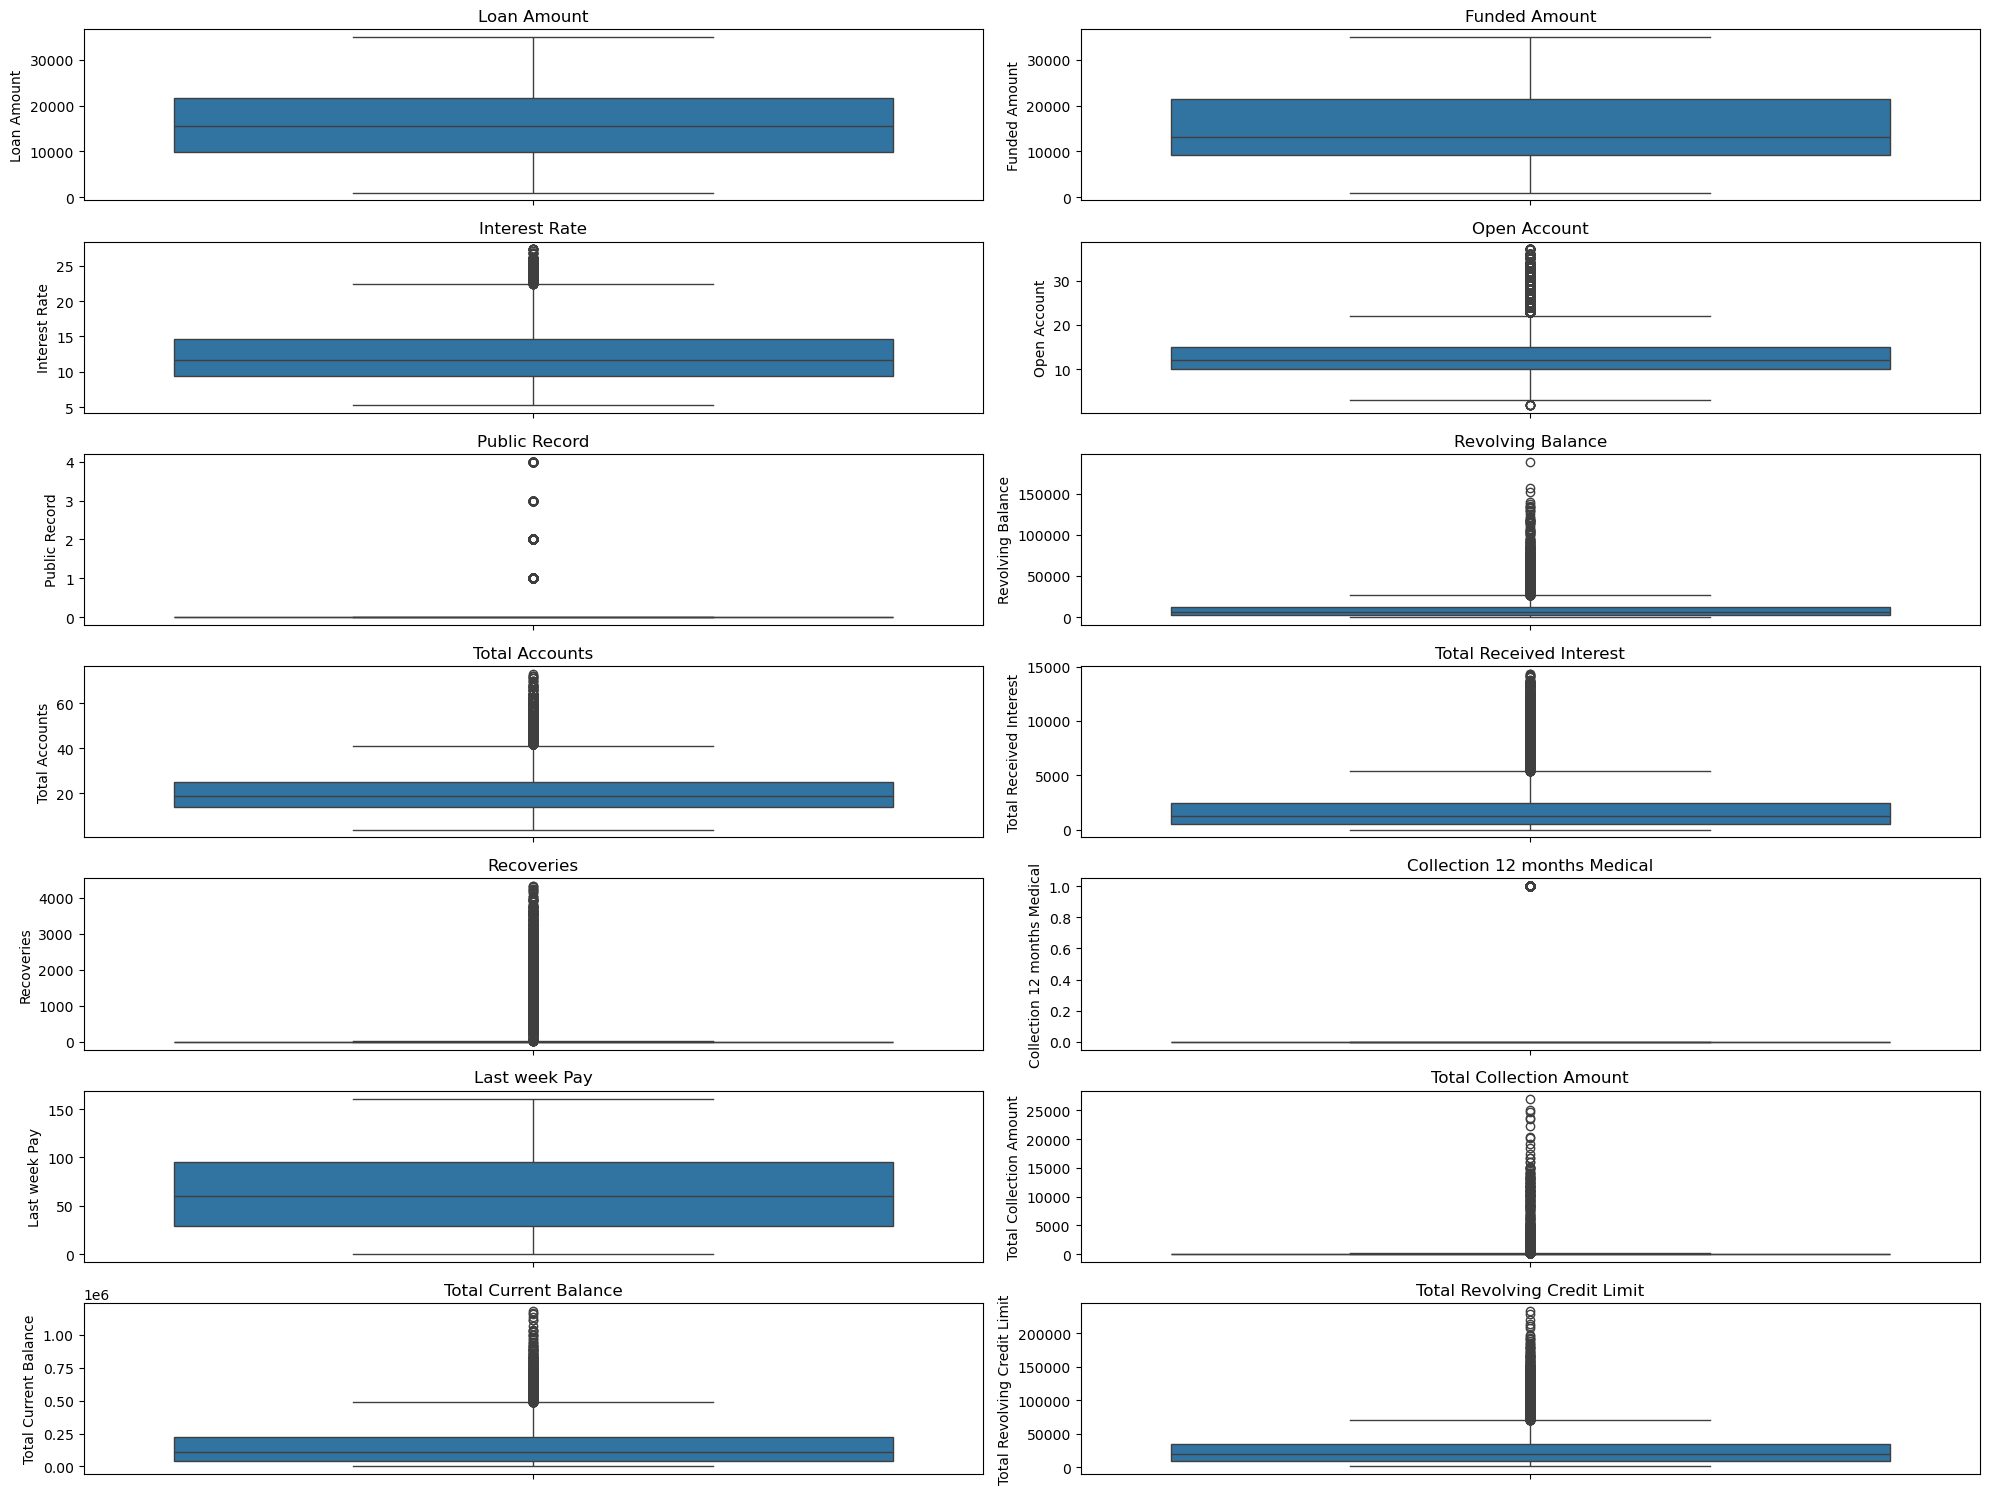

In [120]:
cols = ['Loan Amount', 'Funded Amount',  
       'Interest Rate',   'Open Account',
       'Public Record', 'Revolving Balance', 
       'Total Accounts', 'Total Received Interest', 
       'Recoveries',  'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit']
fig, axes = plt.subplots(nrows=7,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=test_df,y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

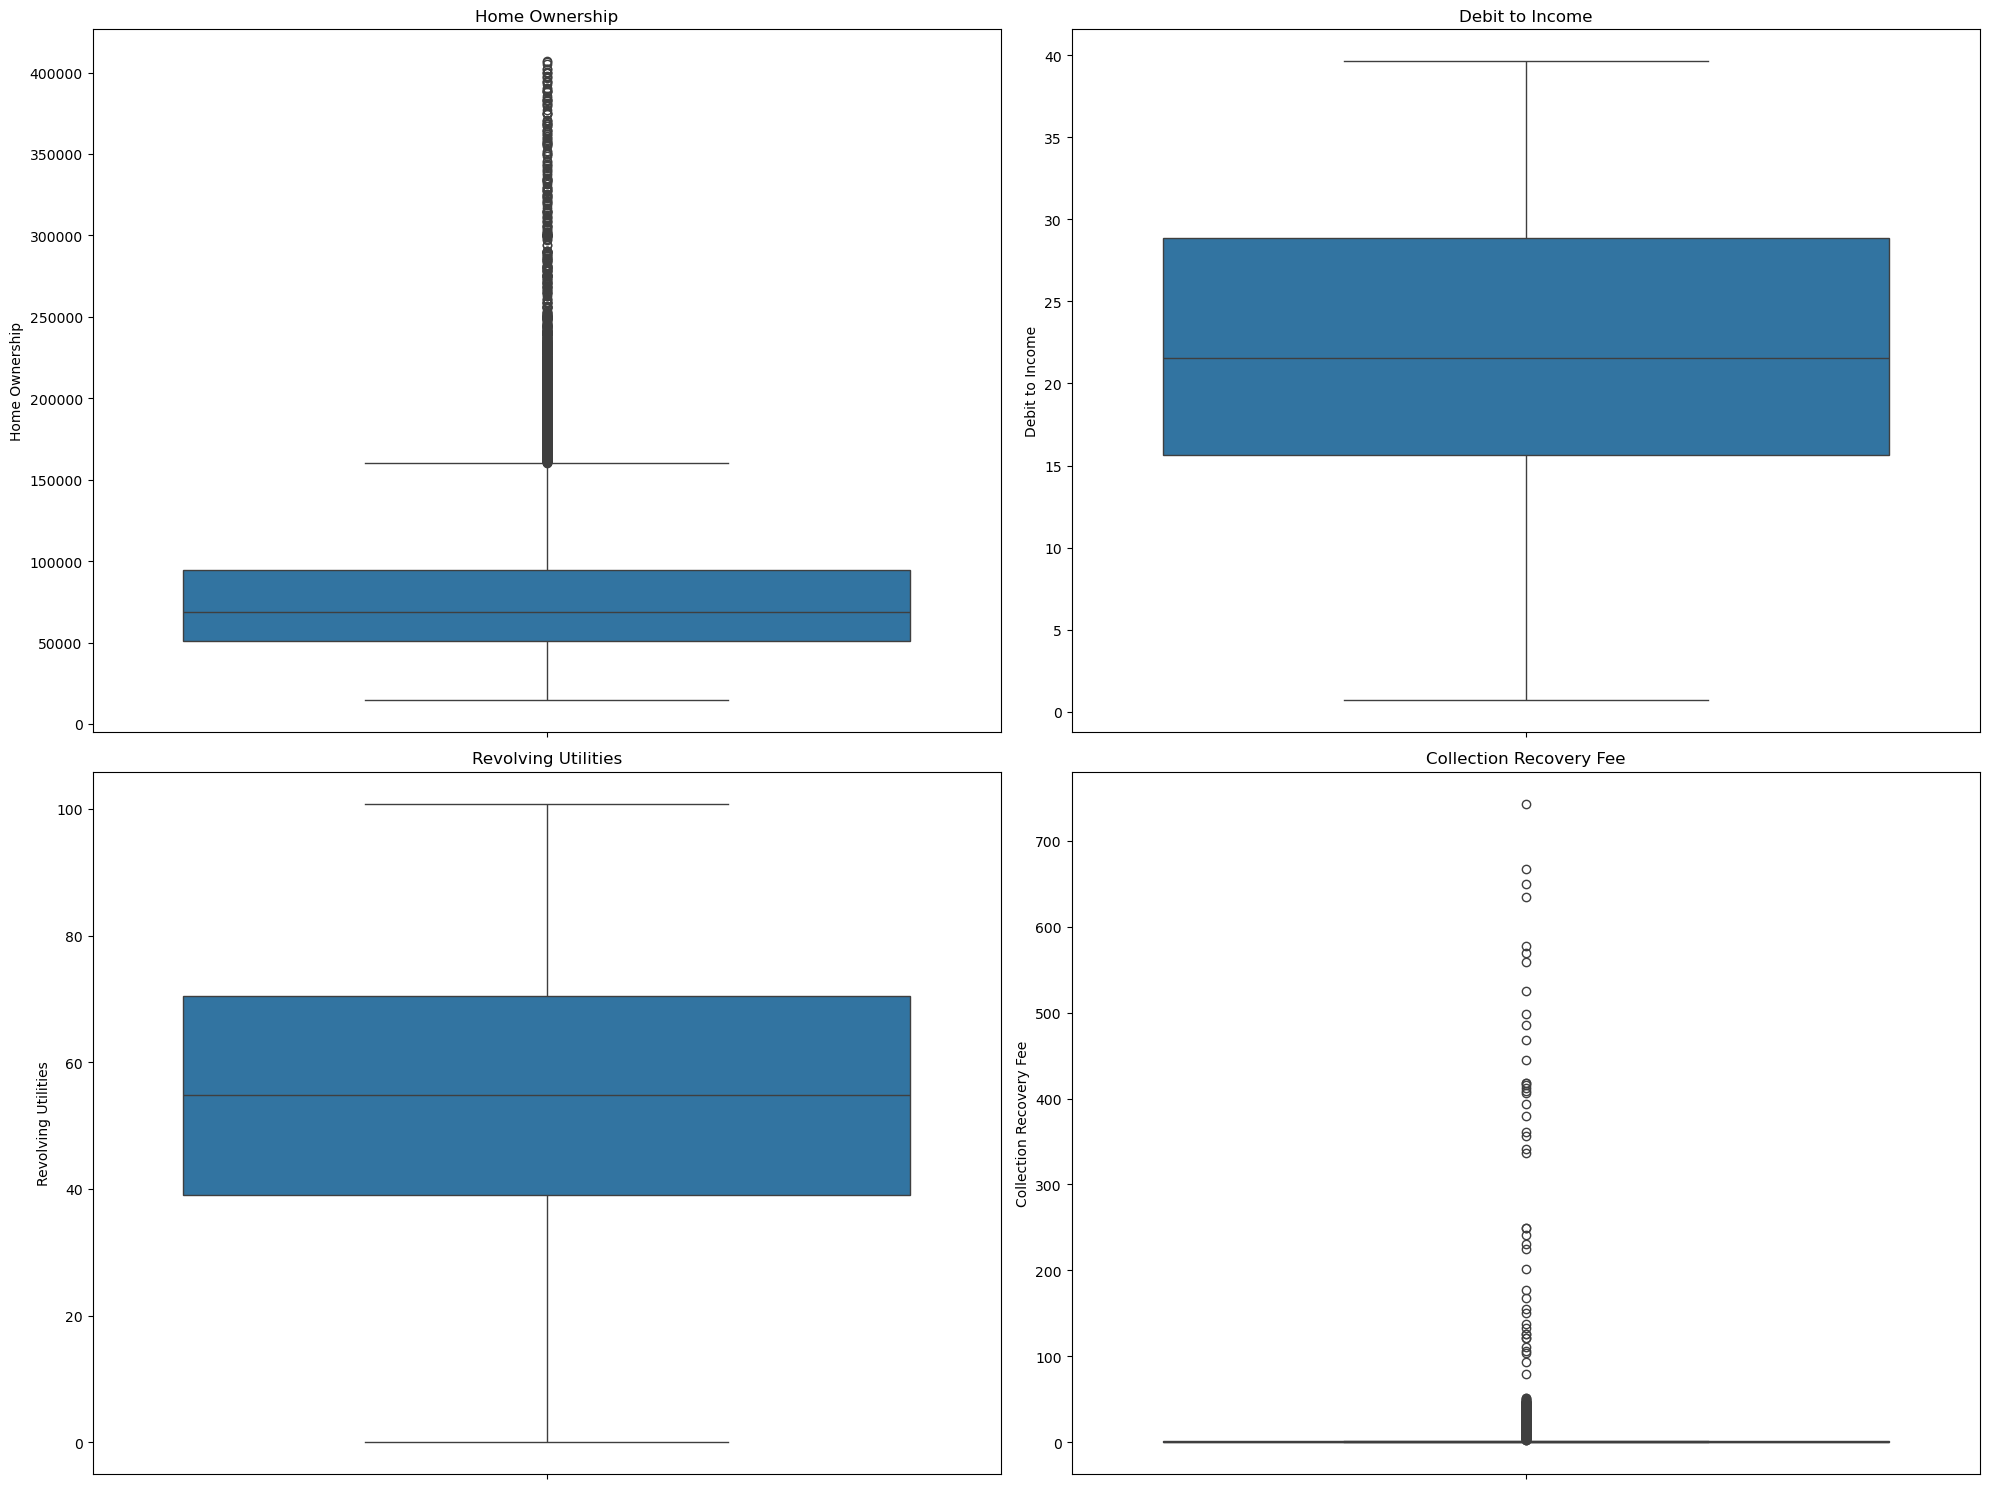

In [121]:
cols = ['Home Ownership', 'Debit to Income',
        'Revolving Utilities',
        'Collection Recovery Fee'  
       ]
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=test_df,y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

In [122]:
def outlier_removal(df,columns):
    new_df = test_df.copy()
    for col in columns:
        col_values = test_df[col].values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
        col_iqr = q75 - q25
        print('iqr: {}'.format(col_iqr))

        cut_off = col_iqr * 3
        lower_bound,upper_bound = q25 - cut_off, q75 + cut_off
        print('Cut Off: {}'.format(cut_off))
        print('Lower Bound: {}'.format(lower_bound))
        print('Upper Bound: {}'.format(upper_bound))

        outliers = [x for x in col_values if x < lower_bound or x > upper_bound]
        print(f'Feature {col} Outliers: {len(outliers)}')
        new_df = new_df.drop(new_df[(new_df[col] > upper_bound) | (new_df[col] < lower_bound)].index)
        print('----' * 30)
    return new_df

cols = ['Revolving Balance']
new_test_df = outlier_removal(test_df,cols)

Quartile 25: 3177.0 | Quartile 75: 12803.0
iqr: 9626.0
Cut Off: 28878.0
Lower Bound: -25701.0
Upper Bound: 41681.0
Feature Revolving Balance Outliers: 547
------------------------------------------------------------------------------------------------------------------------


In [123]:
test_df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [124]:
#test_df.drop(['Loan Title','Grade'],axis= 1,inplace=True)

In [125]:
#identify the numerical columns
num_cols = test_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = test_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(test_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

print(numerical_columns)
print(categorical_columns)
print(binary_columns)

['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']
Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')
['Collection 12 months Medical', 'Accounts Delinquent']


In [126]:
#find the skewness of the numerical features
skewness = test_df[numerical_columns].skew()
print(skewness)

# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)

# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    test_df[col] = np.log1p(test_df[col])

ID                               0.338152
Loan Amount                      0.363403
Funded Amount                    0.652050
Funded Amount Investor           0.887545
Term                            -1.566448
Interest Rate                    0.591363
Home Ownership                   2.196846
Debit to Income                  0.096149
Delinquency - two years          4.379893
Inquires - six months            2.879791
Open Account                     1.378282
Public Record                    4.825962
Revolving Balance                3.545077
Revolving Utilities             -0.229700
Total Accounts                   0.976915
Total Received Interest          2.247324
Total Received Late Fee          5.746722
Recoveries                       8.074211
Collection Recovery Fee         31.579439
Last week Pay                    0.444627
Total Collection Amount         13.503924
Total Current Balance            1.538053
Total Revolving Credit Limit     2.148043
dtype: float64
['Home Ownership', 

In [127]:
#identify the numerical columns
numerical_columns = test_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = test_df.drop(num_cols,axis= 1).columns

In [128]:
# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(test_df[categorical_columns])
# Concatenate the original DataFrame with the encoded features along the columns axis
test_df = pd.concat([test_df, encoded_features], axis=1)
# Drop the original categorical columns if needed
test_df.drop(categorical_columns, axis=1, inplace=True) 

In [129]:
def feature_scaling(dataset, num_cols):
    sc_x = StandardScaler()
    dataset[num_cols] = sc_x.fit_transform(dataset[num_cols])
    return dataset

final_test_df = feature_scaling(test_df, numerical_columns)

In [130]:
final_test_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Loan Title_refi,Loan Title_refinance,Loan Title_refinance loan,Loan Title_relief,Loan Title_vacation,Loan Title_wedding loan,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,1.225453,0.085655,-0.638520,0.177524,0.495674,-0.006047,0.165797,-0.624899,1.312588,-0.455413,...,False,False,False,False,False,False,True,False,True,False
1,-0.313070,-1.109140,-0.482380,-0.294006,0.495674,-1.437741,-1.254822,-0.462177,-0.494193,-0.455413,...,False,False,False,False,False,False,False,True,True,False
2,-0.887595,1.063193,1.240011,-0.431554,0.495674,0.650013,-0.648535,-0.804998,-0.494193,-0.455413,...,False,False,False,False,False,False,True,False,True,False
3,-0.876917,1.719990,-0.723697,0.087727,0.495674,-0.425397,-0.047518,-0.100112,-0.494193,-0.455413,...,False,False,False,False,False,False,False,True,True,False
4,0.830257,-0.900377,-0.753467,-1.046280,0.384459,-0.560076,0.532715,-2.003718,-0.494193,-0.455413,...,False,False,False,False,False,False,False,True,True,False


In [131]:
final_test_df.shape

(28913, 202)

In [132]:
y_predictions_test = voting_classifier_tuned.predict(final_test_df)

In [133]:
len(y_predictions_test)

28913

In [134]:
# Convert NumPy array to Pandas Series
y_pred_test = pd.Series(y_predictions_test)

y_pred_test.value_counts()

0    27223
1     1690
Name: count, dtype: int64

In [135]:
y_pred_test.value_counts(normalize=True)

0    0.941549
1    0.058451
Name: proportion, dtype: float64

In [136]:
# Define a dictionary to map values
status_mapping = {0: 'Paid', 1: 'Defaulted'}

# Replace values in the series
loan_status_test = y_pred_test.replace(status_mapping)

# Now you can use the value_counts() method
loan_status_test.value_counts()

Paid         27223
Defaulted     1690
Name: count, dtype: int64

In [137]:
loan_status_test.head()

0    Paid
1    Paid
2    Paid
3    Paid
4    Paid
dtype: object

In [138]:
# Convert the Series to a DataFrame
loan_status_test_df = pd.DataFrame({'loan_status': loan_status_test})

# Save the DataFrame to an Excel file
loan_status_test_df.to_excel("loan_status_test.xlsx", index=False)

In [139]:
*****************************************************************************************************************

SyntaxError: invalid syntax (2391468556.py, line 1)